### Import the necessary libraries for hierarchical and K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sns.set_palette('deep')
sns.set(color_codes='True')

# Problem 1: Linear Regression

## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
#import the dataset and check first 5 records
df = pd.read_csv('cubic_zirconia.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
# Lets remove the first serial number column
df.drop('Unnamed: 0',axis = 1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
# Find the categorical column unique values
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':',df[i].sort_values().unique())

cut : ['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
color : ['D' 'E' 'F' 'G' 'H' 'I' 'J']
clarity : ['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


In [6]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 697


In [8]:
# Check for duplicates
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 34


In [9]:
# Lets see the duplicate rows
df[df.duplicated()].sort_values(by='carat')

,carat,cut,color,clarity,depth,table,x,y,z,price
25759,0.30,Ideal,G,IF,62.1,55.0,4.32,4.35,2.69,863
20301,0.30,Ideal,H,SI1,62.2,57.0,4.26,4.29,2.66,450
19731,0.30,Good,J,VS1,63.4,57.0,4.23,4.26,2.69,394
18777,0.32,Premium,H,VS2,60.6,58.0,4.47,4.44,2.70,648
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
22583,0.33,Ideal,F,IF,61.2,56.0,4.47,4.49,2.74,1240
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
26530,0.41,Ideal,G,IF,61.7,56.0,4.77,4.80,2.95,1367
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943


In [10]:
# Drop the duplicate rows
df.drop_duplicates(keep='first',inplace=True)
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 0


In [11]:
# Updated data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
# Data summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


In [13]:
# Lets calculate range IQR and Quartile min and Quartile max of cotinuous variables into a dataset
df_desc = df.describe().T
df_desc['Range'] = df_desc['max'] - df_desc['min']
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc['Qmin'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - 1.5 * df_desc['IQR']))
df_desc['Qmax'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + 1.5 * df_desc['IQR']))
df_desc

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50,4.30,0.65,0.200,2.025
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60,22.80,1.50,58.750,64.750
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00,30.00,3.00,51.500,63.500
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23,10.23,1.84,1.950,9.310
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90,58.90,1.83,1.965,9.285
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80,31.80,1.14,1.190,5.750
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00,18492.00,4411.00,326.000,11972.500


### Univariate Analysis

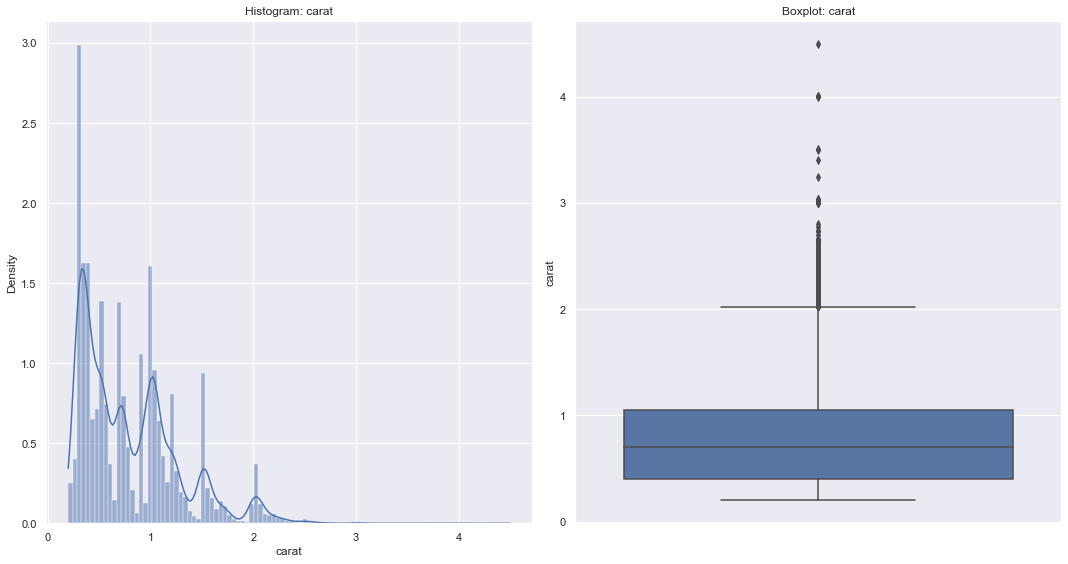

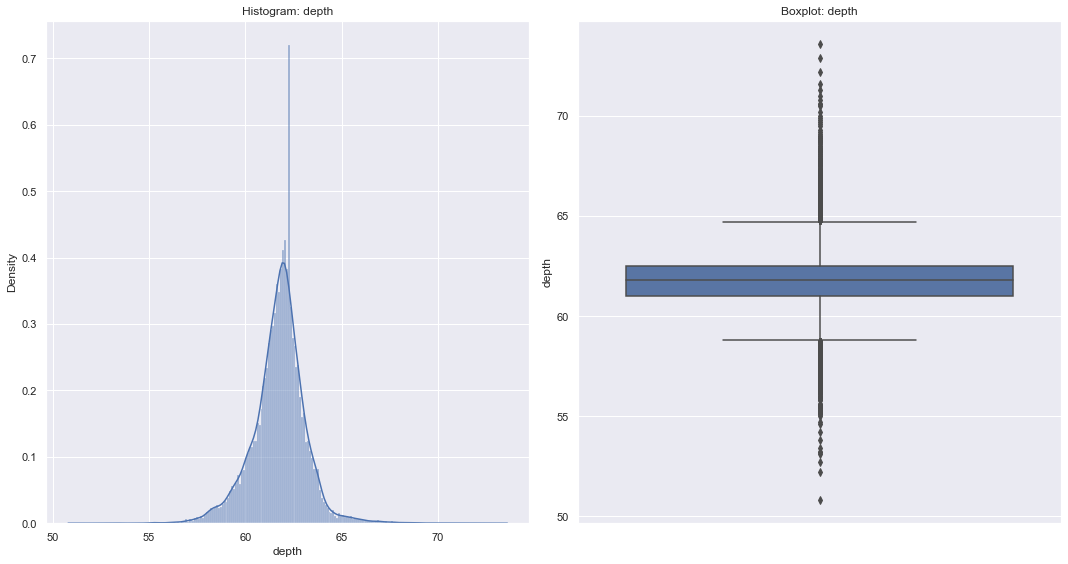

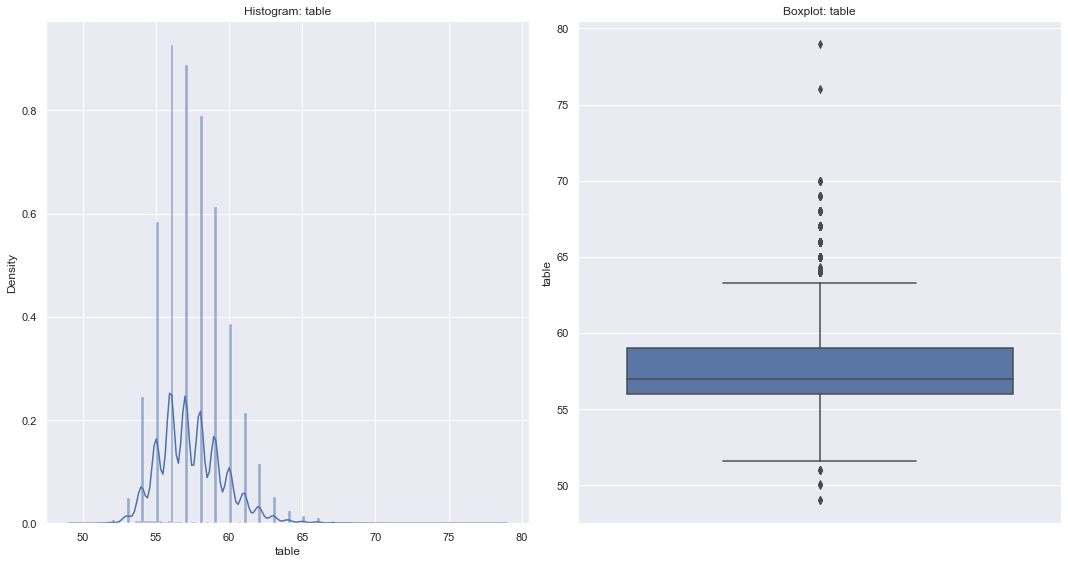

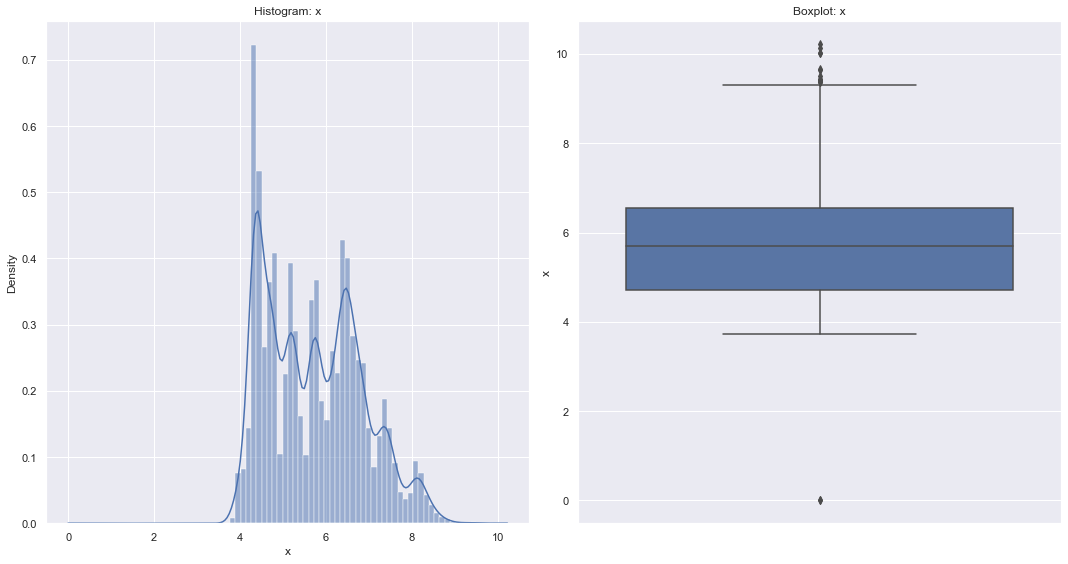

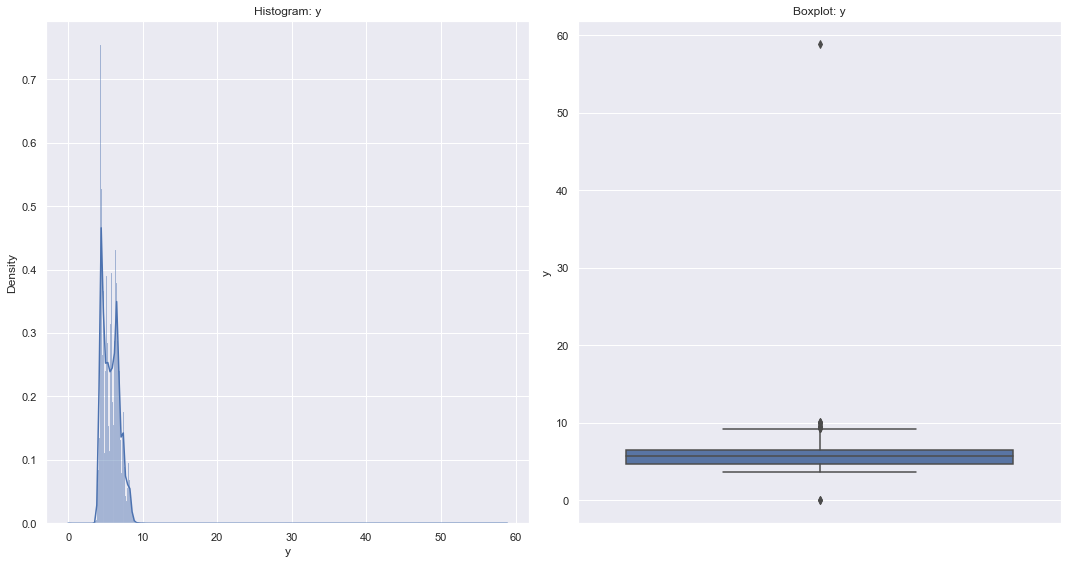

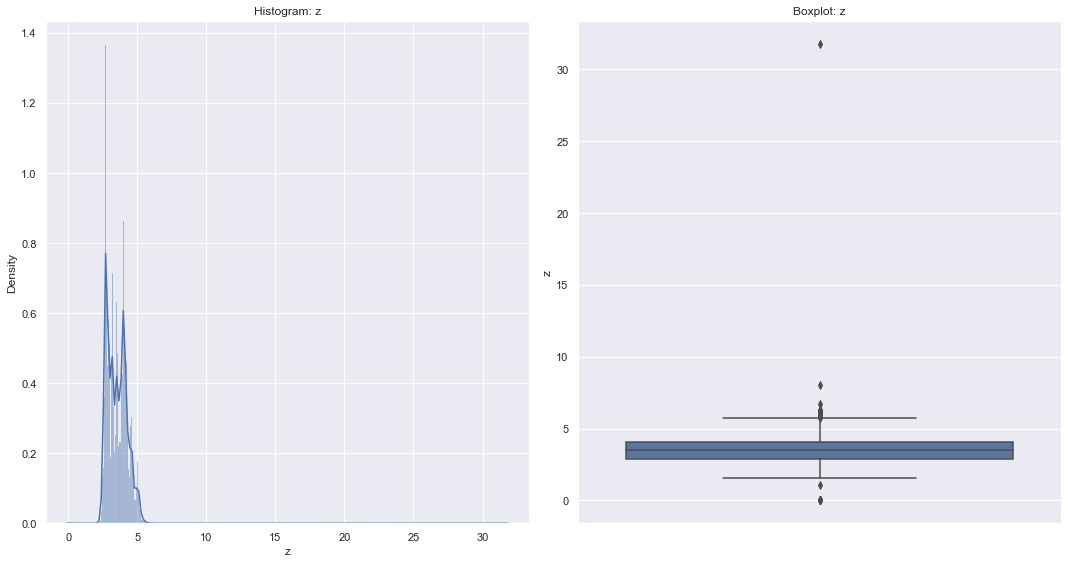

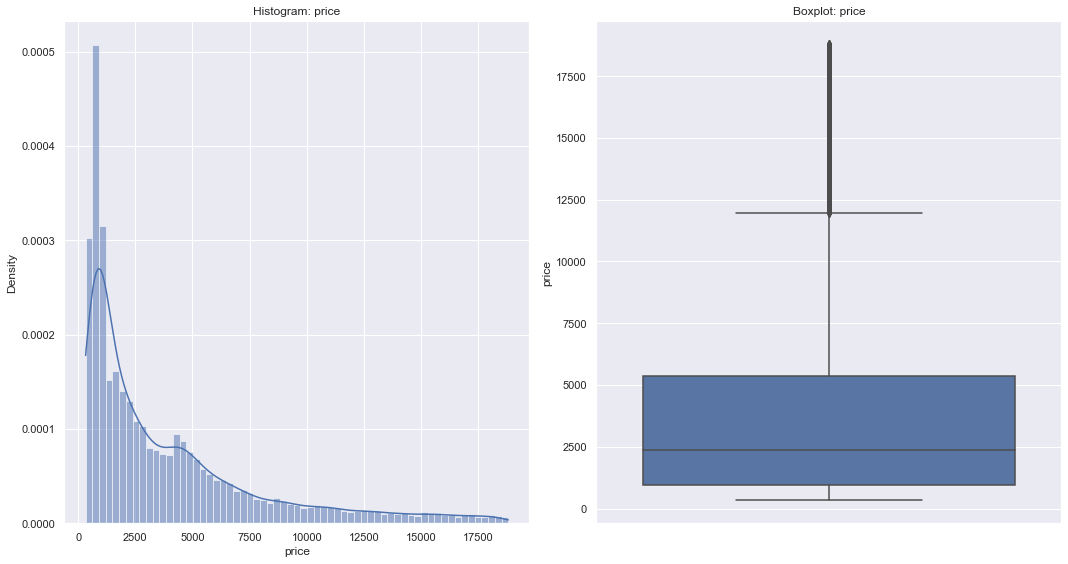

In [14]:
# Check the histogram and boxplot of the 7 numeric varaibles
for i in df.columns:
    if df[i].dtype not in ['object']:
        plt.figure(figsize = (15,8));
        plt.subplot(1,2,1);
        sns.histplot(x=df[i],kde=True,stat='density');
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=df[i],data=df);
        plt.title('Boxplot: {}'.format(i))                
        plt.tight_layout();

In [15]:
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':')
        print(df[i].value_counts())
        print('------------------','\n','\n')

cut :
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
------------------ 
 

color :
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
------------------ 
 

clarity :
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64
------------------ 
 



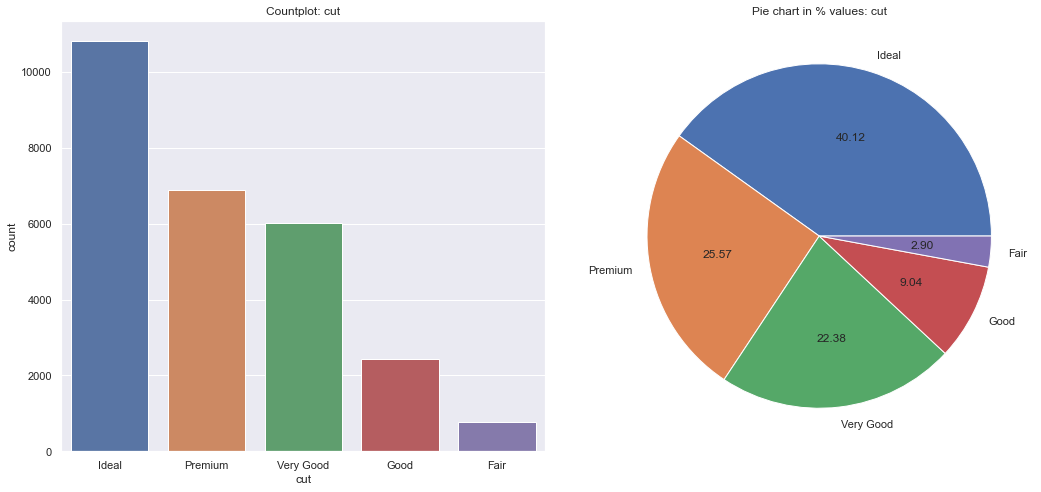

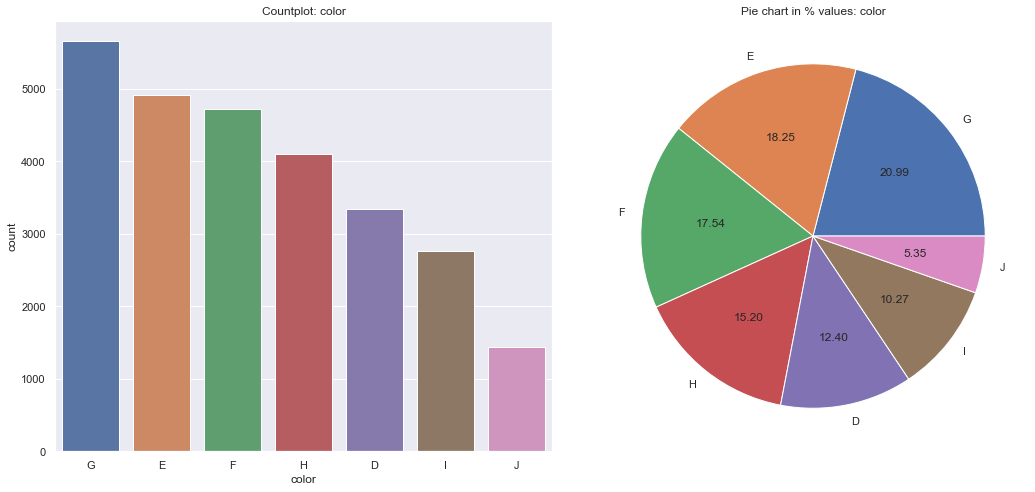

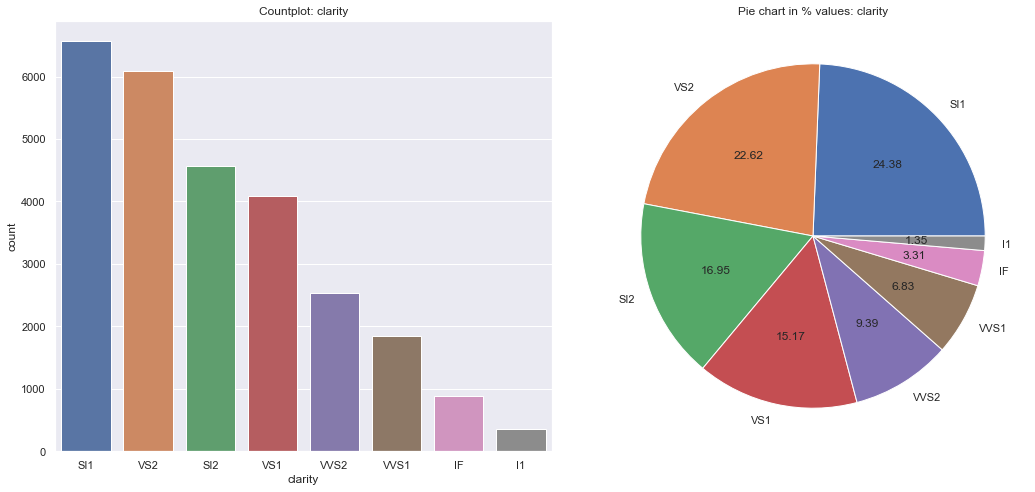

In [16]:
# countplot and piechart showing distribution of categories across the variable for object columns
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot: {}'.format(i));
        plt.subplot(1,2,2);
        plt.pie(x=df[i].value_counts(),labels = df[i].value_counts().index,autopct='%.2f')
        plt.title('Pie chart in % values: {}'.format(i))                
        plt.tight_layout();
        

### Bivariate/Multivariate Analysis

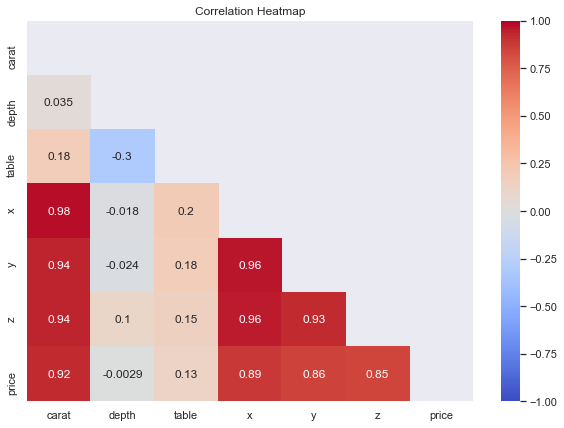

In [17]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

<Figure size 1080x720 with 0 Axes>

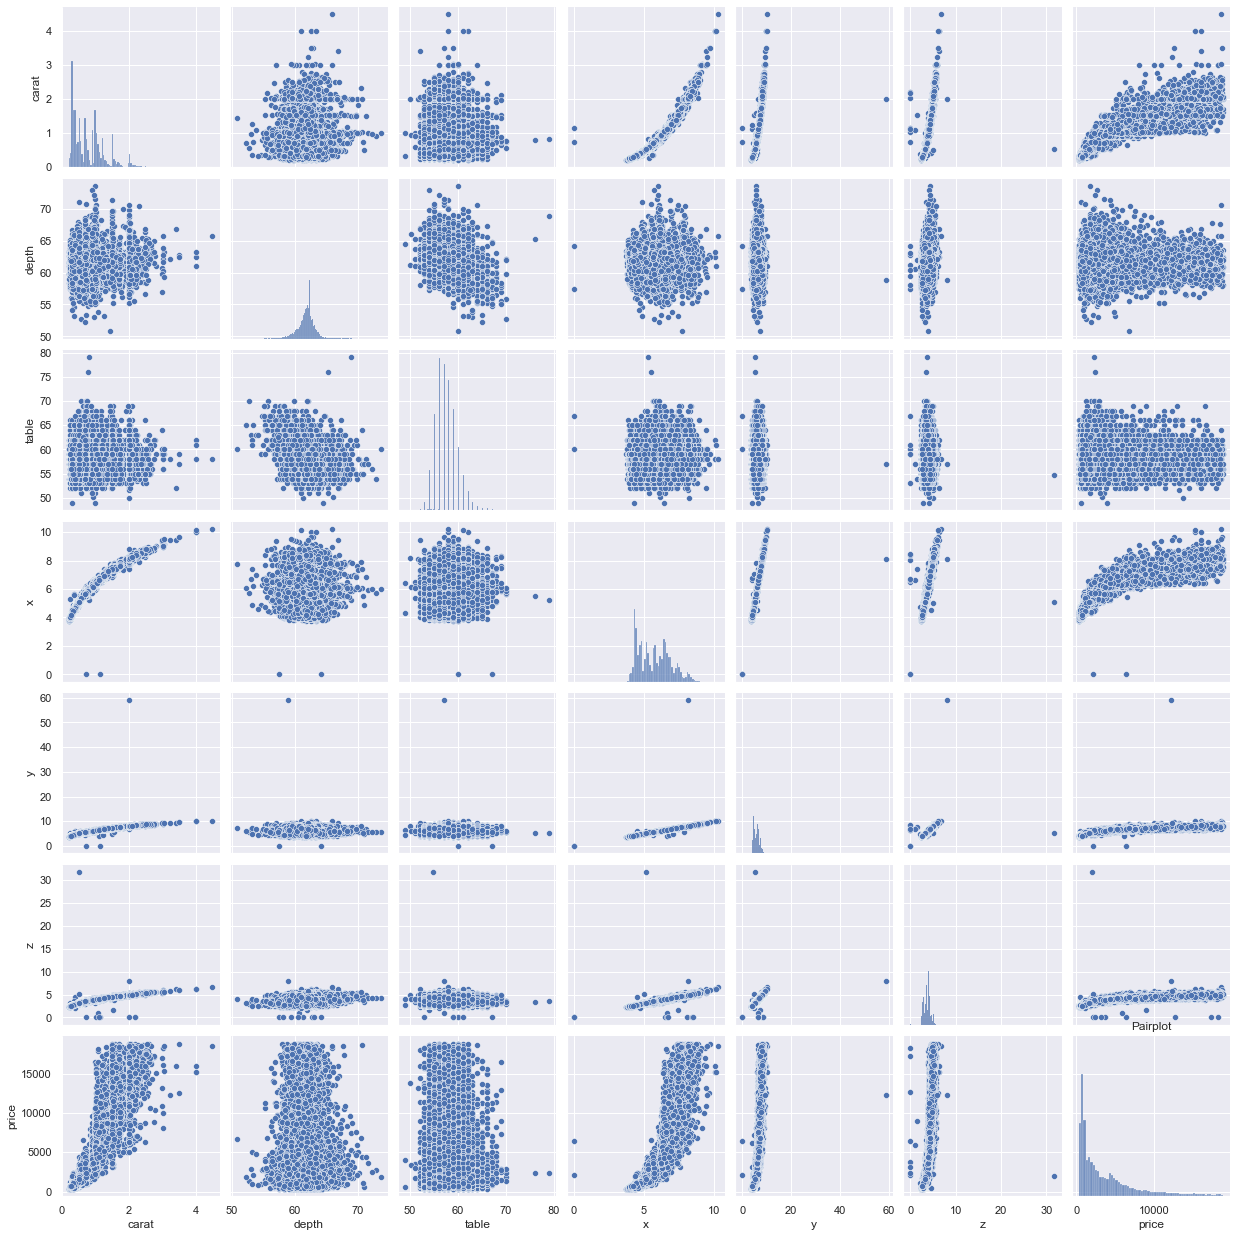

In [18]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.title('Pairplot');

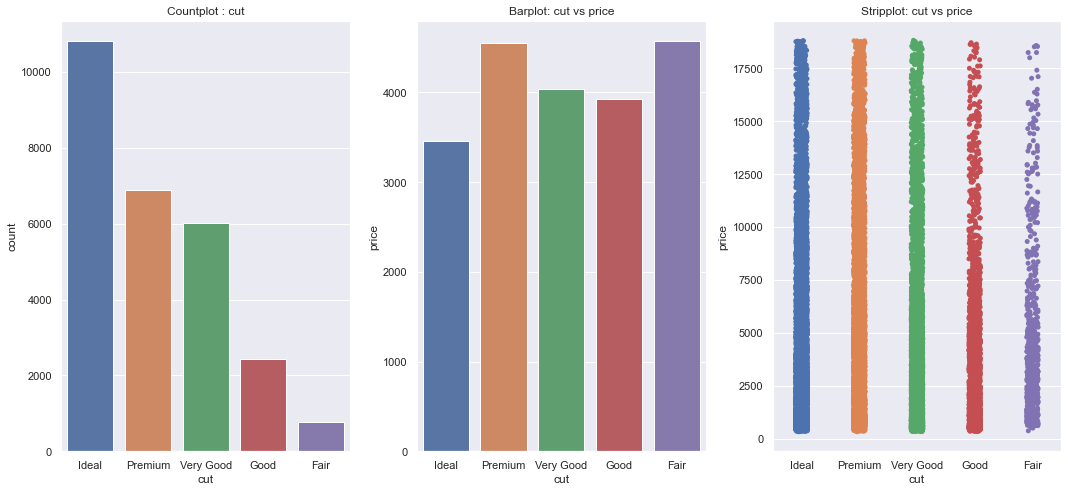

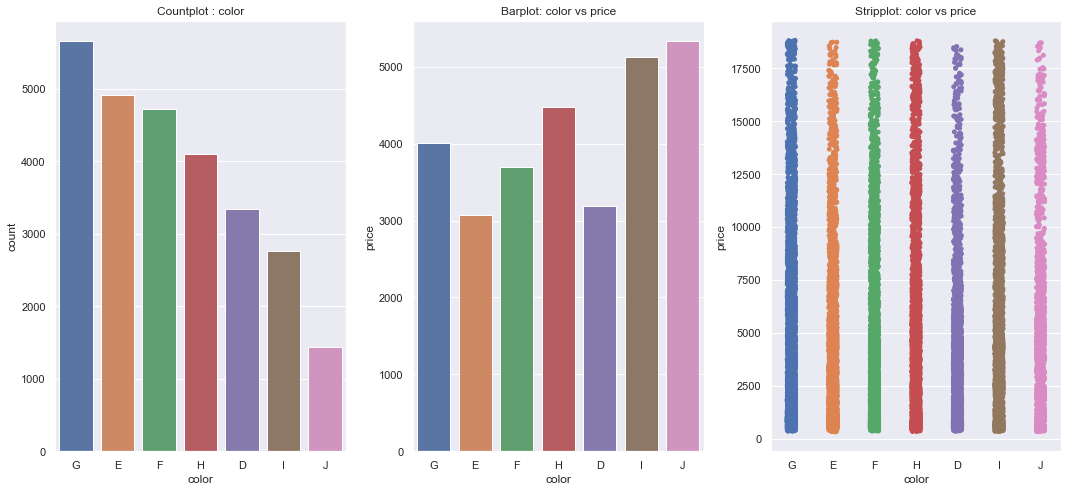

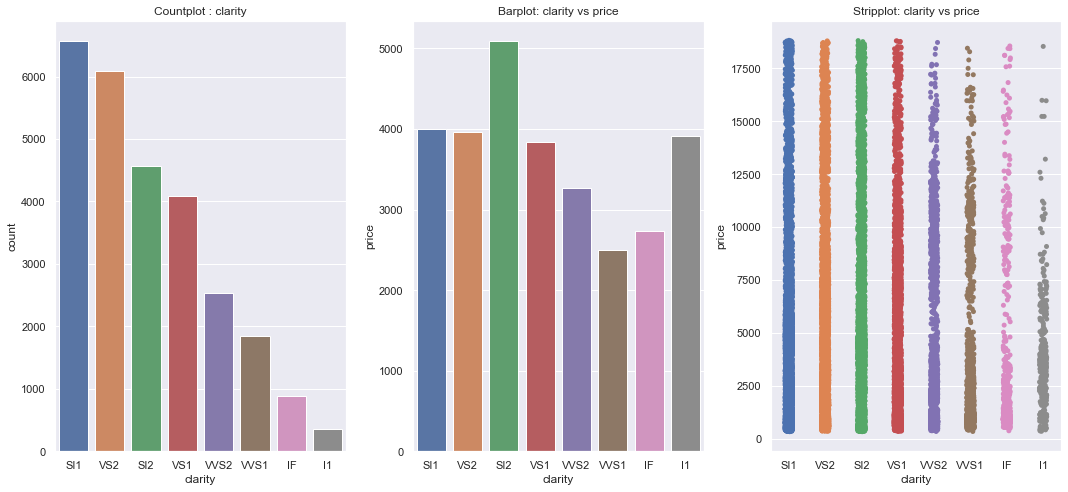

In [19]:
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,3,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot : {}'.format(i));
        plt.subplot(1,3,2)
        sns.barplot(data =df,y='price',x=i,ci=None,order = df[i].value_counts().index);
        plt.title('Barplot: {} vs price'.format(i));
        plt.subplot(1,3,3);
        sns.stripplot(data = df, x=i,y='price',order = df[i].value_counts().index );
        plt.title('Stripplot: {} vs price'.format(i));                
        plt.tight_layout();

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [20]:
# Check for null values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [21]:
# Replacing the nulls in depth with median value.
df['depth'].fillna(df['depth'].median(),inplace=True)

In [22]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


In [23]:
# Re-check for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [24]:
# Check for the 0 occurence in the dataframe
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [25]:
# Dropping zero values
df.drop(df[df.eq(0).any(axis=1)].index,inplace=True)
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [26]:
# Reset the index and show concise data summary
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


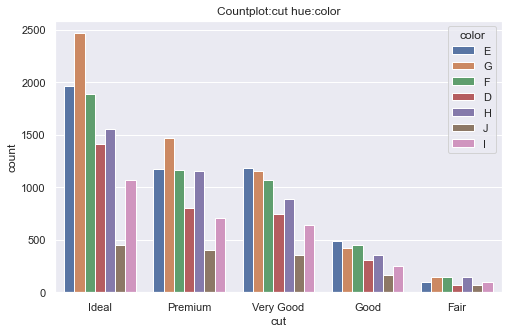

In [27]:
# Countplot of cut with hue as color
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='cut',hue='color')
plt.title('Countplot:cut hue:color');

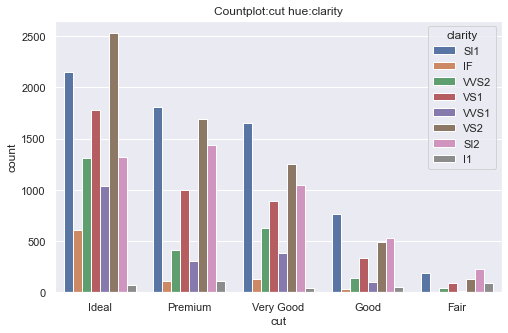

In [28]:
# Countplot of cut with hue as clarity
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='cut',hue='clarity')
plt.title('Countplot:cut hue:clarity');

In [29]:
# Lets replace cut "Very Good" as "Good"
df['cut'].replace("Very Good", "Good",inplace = True)
df['cut'].value_counts()

Ideal      10805
Good        8461
Premium     6880
Fair         779
Name: cut, dtype: int64

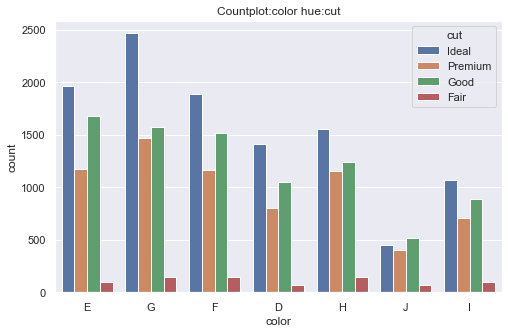

In [30]:
# Countplot of color with hue as cut
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='color',hue='cut')
plt.title('Countplot:color hue:cut');

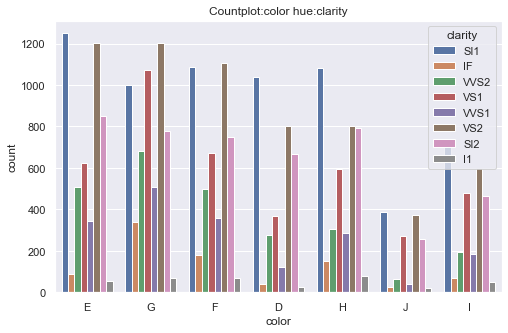

In [31]:
# Countplot of color with hue as clarity
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='color',hue='clarity')
plt.title('Countplot:color hue:clarity');

In [32]:
# Lets replace color "D" as "E" and 'J' as 'I'
df['color'].replace("D", "E",inplace = True)
df['color'].replace("J", "I",inplace = True)
df['color'].value_counts()

E    8257
G    5650
F    4722
I    4205
H    4091
Name: color, dtype: int64

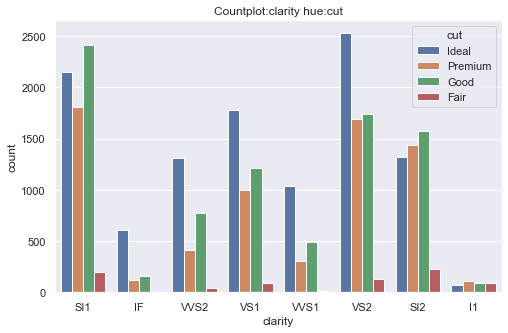

In [33]:
# Countplot of clarity with hue as cut
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='clarity',hue='cut')
plt.title('Countplot:clarity hue:cut');

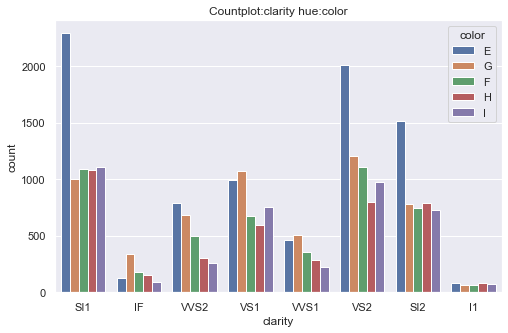

In [34]:
# Countplot of clarity with hue as color
plt.figure(figsize = (8,5))
sns.countplot(data=df,x='clarity',hue='color')
plt.title('Countplot:clarity hue:color');

In [35]:
# Lets replace clarity "VS1" and VS2 as "Sl1"
df['clarity'].replace("VS1", "SI1",inplace = True)
df['clarity'].replace("VS2", "SI1",inplace = True)
df['clarity'].value_counts()

SI1     16742
SI2      4561
VVS2     2530
VVS1     1839
IF        891
I1        362
Name: clarity, dtype: int64

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [36]:
# lets first do scaling on the data, we will get the continuous variables into a different dataset and then apply StandardScaler
df_num = pd.DataFrame()
for i in df.columns:
    if df[i].dtype not in ['object']:
        df_num[i] = df[i]

df_num.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


In [37]:
# Check the concise data summary of numerical columns
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   26925 non-null  float64
 1   depth   26925 non-null  float64
 2   table   26925 non-null  float64
 3   x       26925 non-null  float64
 4   y       26925 non-null  float64
 5   z       26925 non-null  float64
 6   price   26925 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.4 MB


In [38]:
# Using standard scaler scale the numerical data and check the data summary
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,6.876991e-17,1.000019,-1.253094,-0.833873,-0.205043,0.528593,7.760145
depth,26925.0,-2.172610e-15,1.000019,-7.856137,-0.464309,0.038048,0.540405,8.506356
table,26925.0,-2.825862e-15,1.000019,-3.789432,-0.652227,-0.204055,0.692289,9.655731
x,26925.0,-4.757404e-16,1.000019,-1.775558,-0.905267,-0.034976,0.728749,3.996782
y,26925.0,4.148008e-16,1.000019,-1.738404,-0.879149,-0.028486,0.693288,45.683886
z,26925.0,-3.752121e-16,1.000019,-3.441009,-0.890379,-0.026232,0.698537,39.390055
price,26925.0,-2.514444e-17,1.000019,-0.897869,-0.743924,-0.388780,0.352346,3.701091


In [39]:
# Add the 3 categorical columns to this scaled dataset
for i in df.columns:
    if df[i].dtype in ['object']:
        df_scaled[i] = df[i]
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   depth    26925 non-null  float64
 2   table    26925 non-null  float64
 3   x        26925 non-null  float64
 4   y        26925 non-null  float64
 5   z        26925 non-null  float64
 6   price    26925 non-null  float64
 7   cut      26925 non-null  object 
 8   color    26925 non-null  object 
 9   clarity  26925 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [40]:
# get dummy variables for the 3 ordinal variables
df = pd.get_dummies(df_scaled,columns =['cut','color','clarity'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26925 non-null  float64
 1   depth         26925 non-null  float64
 2   table         26925 non-null  float64
 3   x             26925 non-null  float64
 4   y             26925 non-null  float64
 5   z             26925 non-null  float64
 6   price         26925 non-null  float64
 7   cut_Good      26925 non-null  uint8  
 8   cut_Ideal     26925 non-null  uint8  
 9   cut_Premium   26925 non-null  uint8  
 10  color_F       26925 non-null  uint8  
 11  color_G       26925 non-null  uint8  
 12  color_H       26925 non-null  uint8  
 13  color_I       26925 non-null  uint8  
 14  clarity_IF    26925 non-null  uint8  
 15  clarity_SI1   26925 non-null  uint8  
 16  clarity_SI2   26925 non-null  uint8  
 17  clarity_VVS1  26925 non-null  uint8  
 18  clarity_VVS2  26925 non-nu

In [41]:
# Applying linear regression
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18847 entries, 5029 to 235
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         18847 non-null  float64
 1   depth         18847 non-null  float64
 2   table         18847 non-null  float64
 3   x             18847 non-null  float64
 4   y             18847 non-null  float64
 5   z             18847 non-null  float64
 6   cut_Good      18847 non-null  uint8  
 7   cut_Ideal     18847 non-null  uint8  
 8   cut_Premium   18847 non-null  uint8  
 9   color_F       18847 non-null  uint8  
 10  color_G       18847 non-null  uint8  
 11  color_H       18847 non-null  uint8  
 12  color_I       18847 non-null  uint8  
 13  clarity_IF    18847 non-null  uint8  
 14  clarity_SI1   18847 non-null  uint8  
 15  clarity_SI2   18847 non-null  uint8  
 16  clarity_VVS1  18847 non-null  uint8  
 17  clarity_VVS2  18847 non-null  uint8  
dtypes: float64(6), uint8(12)


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8078 entries, 11961 to 25129
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         8078 non-null   float64
 1   depth         8078 non-null   float64
 2   table         8078 non-null   float64
 3   x             8078 non-null   float64
 4   y             8078 non-null   float64
 5   z             8078 non-null   float64
 6   cut_Good      8078 non-null   uint8  
 7   cut_Ideal     8078 non-null   uint8  
 8   cut_Premium   8078 non-null   uint8  
 9   color_F       8078 non-null   uint8  
 10  color_G       8078 non-null   uint8  
 11  color_H       8078 non-null   uint8  
 12  color_I       8078 non-null   uint8  
 13  clarity_IF    8078 non-null   uint8  
 14  clarity_SI1   8078 non-null   uint8  
 15  clarity_SI2   8078 non-null   uint8  
 16  clarity_VVS1  8078 non-null   uint8  
 17  clarity_VVS2  8078 non-null   uint8  
dtypes: float64(6), uint8(12

#### Model 1

In [44]:
# Initaite object of linear regressiona nd fit against training dataset
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Check the coefficient for predictor variables
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[idx]))

The coefficient for carat is 1.3890957612220869
The coefficient for depth is -0.033584020595115206
The coefficient for table is -0.021695863401190382
The coefficient for x is -0.3441615951663043
The coefficient for y is -0.0015853147901337603
The coefficient for z is -0.004887431888159563
The coefficient for cut_Good is 0.1220866037324024
The coefficient for cut_Ideal is 0.17154914994873055
The coefficient for cut_Premium is 0.14041053513019056
The coefficient for color_F is -0.02474537543411789
The coefficient for color_G is -0.06435675171429099
The coefficient for color_H is -0.20536758376009612
The coefficient for color_I is -0.4011107308000616
The coefficient for clarity_IF is 1.2657563545739634
The coefficient for clarity_SI1 is 0.9850591354112564
The coefficient for clarity_SI2 is 0.6404579433089849
The coefficient for clarity_VVS1 is 1.1985391133035759
The coefficient for clarity_VVS2 is 1.1947073204403738


In [46]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for the model is {}".format(intercept))

The intercept for the model is -0.98884601253559


In [47]:
# R square on training data

print("The R2 for the model on training data is {}".format(regression_model.score(X_train,y_train)))

The R2 for the model on training data is 0.9132552823265415


In [48]:
# R square on testing data
print("The R2 for the model on testing data is {}".format(regression_model.score(X_test,y_test)))

The R2 for the model on testing data is 0.9170890039419749


In [49]:
# RMSE on training data
rmse_train = np.sqrt(np.mean((y_train - regression_model.predict(X_train))**2));
print("The RMSE for the model on training data is {}".format(rmse_train))

The RMSE for the model on training data is 0.2935838537381607


In [50]:
# RMSE on testing data
rmse_test = np.sqrt(np.mean((y_test - regression_model.predict(X_test))**2));
print("The RMSE for the model on training data is {}".format(rmse_test))

The RMSE for the model on training data is 0.29007336898159625


In [51]:
# Lets check the presence of multicollinearity in the input data
df_variables = df.copy()
df_variables.drop(['price'],axis = 1, inplace=True)
vif_data = [variance_inflation_factor(df_variables.values, i)
                          for i in range(len(df_variables.columns))]
for i in range(len(df_variables.columns)):
    print('vif for column - {} is {}'.format(df_variables.columns[i],vif_data[i]))


vif for column - carat is 25.439356282134046
vif for column - depth is 1.535722830598281
vif for column - table is 1.6937705134348677
vif for column - x is 48.53065334378165
vif for column - y is 13.902472236616575
vif for column - z is 16.08901627259279
vif for column - cut_Good is 10.052551443795608
vif for column - cut_Ideal is 14.280100554163852
vif for column - cut_Premium is 8.575242987652842
vif for column - color_F is 1.5657600930408888
vif for column - color_G is 1.719781590705378
vif for column - color_H is 1.5381454909982508
vif for column - color_I is 1.6576662752715854
vif for column - clarity_IF is 2.1205682357806017
vif for column - clarity_SI1 is 20.201082066450525
vif for column - clarity_SI2 is 6.0000016572472505
vif for column - clarity_VVS1 is 3.2647473297199654
vif for column - clarity_VVS2 is 3.985840000194966


In [52]:
# Lets see statsmodel ols method on the training data. We will concatenate teh predictor and target variable
data_train = pd.concat([X_train,y_train],axis = 1)
data_test = pd.concat([X_test,y_test],axis = 1)

In [53]:
# Check the column names
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'color_F', 'color_G', 'color_H', 'color_I', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [54]:
# ols model fit for training data
formula = 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+color_F+color_G+color_H+color_I+clarity_IF+clarity_SI1+clarity_SI2+clarity_VVS1+clarity_VVS2'
lm_model = ols(formula=formula,data=data_train).fit()
print(lm_model.summary())
R2_adj_train = lm_model.rsquared_adj 
print("The Adjusted R2 for the model on training data is {}".format(R2_adj_train))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:37:09   Log-Likelihood:                -3644.0
No. Observations:               18847   AIC:                             7326.
Df Residuals:                   18828   BIC:                             7475.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9888      0.022    -44.651   

In [55]:
# ols model fit for testing data
formula = 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+color_F+color_G+color_H+color_I+clarity_IF+clarity_SI1+clarity_SI2+clarity_VVS1+clarity_VVS2'
lm_model = ols(formula=formula,data=data_test).fit()
R2_adj_test = lm_model.rsquared_adj 
print("The Adjusted R2 for the model on testing data is {}".format(R2_adj_test))

The Adjusted R2 for the model on testing data is 0.9182084928556183


In [56]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lm1_train_metrics = [round(regression_model.score(X_train,y_train),5), #R2
                     round(R2_adj_train,5), # Adjusted R2
                     round(rmse_train,5)] #RMSE 

lm1_train_metrics

[0.91326, 0.91317, 0.29358]

In [57]:
# we will capture accuracy,precision,recall and roc_auc_score of test data into a list
lm1_test_metrics = [round(regression_model.score(X_test,y_test),5), #R2
                     round(R2_adj_test,5), # Adjusted R2
                     round(rmse_test,5)] #RMSE 

lm1_test_metrics

[0.91709, 0.91821, 0.29007]

In [58]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
lm1_metrics = pd.DataFrame(lm1_train_metrics,index = ['R-square','Adj R-square','RMSE'],
                            columns=['lm1_training'])
lm1_metrics['lm1_test'] = lm1_test_metrics
lm1_metrics

,lm1_training,lm1_test
R-square,0.91326,0.91709
Adj R-square,0.91317,0.91821
RMSE,0.29358,0.29007


#### Model 2

In [59]:
# Lets drop the 'y' and 'z' columns from the train and test dataframe
df.drop(['y','z'],axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26925 non-null  float64
 1   depth         26925 non-null  float64
 2   table         26925 non-null  float64
 3   x             26925 non-null  float64
 4   price         26925 non-null  float64
 5   cut_Good      26925 non-null  uint8  
 6   cut_Ideal     26925 non-null  uint8  
 7   cut_Premium   26925 non-null  uint8  
 8   color_F       26925 non-null  uint8  
 9   color_G       26925 non-null  uint8  
 10  color_H       26925 non-null  uint8  
 11  color_I       26925 non-null  uint8  
 12  clarity_IF    26925 non-null  uint8  
 13  clarity_SI1   26925 non-null  uint8  
 14  clarity_SI2   26925 non-null  uint8  
 15  clarity_VVS1  26925 non-null  uint8  
 16  clarity_VVS2  26925 non-null  uint8  
dtypes: float64(5), uint8(12)
memory usage: 1.3 MB


In [60]:
# Applying linear regression
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [61]:
# Apply linear regression on the training data
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [62]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 1.3889126745972973
The coefficient for depth is -0.03409454670054748
The coefficient for table is -0.02163353811410982
The coefficient for x is -0.3502369544643863
The coefficient for cut_Good is 0.12191682869147097
The coefficient for cut_Ideal is 0.17152963483494324
The coefficient for cut_Premium is 0.1404488717422391
The coefficient for color_F is -0.02471027919361088
The coefficient for color_G is -0.06432360400758085
The coefficient for color_H is -0.20535174453628463
The coefficient for color_I is -0.4010645525729099
The coefficient for clarity_IF is 1.2656636202208056
The coefficient for clarity_SI1 is 0.9849852440177304
The coefficient for clarity_SI2 is 0.6403951374379242
The coefficient for clarity_VVS1 is 1.1984688749483545
The coefficient for clarity_VVS2 is 1.1946358043885252


In [63]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for the model is {}".format(intercept))

The intercept for the model is -0.988749704920028


In [64]:
# R square on training data

print("The R2 for the model on training data is {}".format(regression_model.score(X_train,y_train)))

The R2 for the model on training data is 0.9132527153890151


In [65]:
# R square on testing data
print("The R2 for the model on testing data is {}".format(regression_model.score(X_test,y_test)))

The R2 for the model on testing data is 0.9170863988659084


In [66]:
# RMSE on training data
rmse_train = np.sqrt(np.mean((y_train - regression_model.predict(X_train))**2));
print("The RMSE for the model on training data is {}".format(rmse_train[0]))

The RMSE for the model on training data is 0.29358819755215027


In [67]:
# RMSE on testing data
rmse_test = np.sqrt(np.mean((y_test - regression_model.predict(X_test))**2));
print("The RMSE for the model on training data is {}".format(rmse_test[0]))

The RMSE for the model on training data is 0.2900779260204173


In [68]:
# Lets check the presence of multicollinearity in the input data
df_variables = df.copy()
df_variables.drop(['price'],axis = 1, inplace=True)
vif_data = [variance_inflation_factor(df_variables.values, i)
                          for i in range(len(df_variables.columns))]
for i in range(len(df_variables.columns)):
    print('vif for column - {} is {}'.format(df_variables.columns[i],vif_data[i]))


vif for column - carat is 25.415382677536243
vif for column - depth is 1.334598732604194
vif for column - table is 1.6916709069819942
vif for column - x is 25.492248490521195
vif for column - cut_Good is 10.045368631358834
vif for column - cut_Ideal is 14.279115204078462
vif for column - cut_Premium is 8.574695296982327
vif for column - color_F is 1.565684909873195
vif for column - color_G is 1.7197049615781685
vif for column - color_H is 1.5380469221668018
vif for column - color_I is 1.6575432520404452
vif for column - clarity_IF is 2.1205283581301666
vif for column - clarity_SI1 is 20.199207118046264
vif for column - clarity_SI2 is 5.9996883577799816
vif for column - clarity_VVS1 is 3.2646086462863275
vif for column - clarity_VVS2 is 3.9856883362441087


In [69]:
# Lets see statsmodel ols method on the training data. We will concatenate teh predictor and target variable
data_train = pd.concat([X_train,y_train],axis = 1)
data_test = pd.concat([X_test,y_test],axis = 1)

In [70]:
# Check the colun names
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'color_F', 'color_G', 'color_H', 'color_I', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [71]:
# ols model fit for training data
formula = 'price ~ carat+depth+table+x+cut_Good+cut_Ideal+cut_Premium+color_F+color_G+color_H+color_I+clarity_IF+clarity_SI1+clarity_SI2+clarity_VVS1+clarity_VVS2'
lm_model = ols(formula=formula,data=data_train).fit()
print(lm_model.summary())
R2_adj_train = lm_model.rsquared_adj
print("The Adjusted R2 for the model on training data is {}".format(R2_adj_train))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:37:09   Log-Likelihood:                -3644.3
No. Observations:               18847   AIC:                             7323.
Df Residuals:                   18830   BIC:                             7456.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9887      0.022    -44.656   

In [72]:
# ols model fit for testing data
formula = 'price ~ carat+depth+table+x+cut_Good+cut_Ideal+cut_Premium+color_F+color_G+color_H+color_I+clarity_IF+clarity_SI1+clarity_SI2+clarity_VVS1+clarity_VVS2'
lm_model = ols(formula=formula,data=data_test).fit()
R2_adj_test = lm_model.rsquared_adj 
print("The Adjusted R2 for the model on testing data is {}".format(R2_adj_test))

The Adjusted R2 for the model on testing data is 0.9175072052200024


In [73]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lm2_train_metrics = [round(regression_model.score(X_train,y_train),5), #R2
                     round(R2_adj_train,5), # Adjusted R2
                     round(rmse_train[0],5)] #RMSE 

lm2_train_metrics

[0.91325, 0.91318, 0.29359]

In [74]:
# we will capture accuracy,precision,recall and roc_auc_score of test data into a list
lm2_test_metrics = [round(regression_model.score(X_test,y_test),5), #R2
                     round(R2_adj_test,5), # Adjusted R2
                     round(rmse_test[0],5)] #RMSE 

lm2_test_metrics

[0.91709, 0.91751, 0.29008]

In [75]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
lm2_metrics = pd.DataFrame(lm2_train_metrics,index = ['R-square','Adj R-square','RMSE'],
                            columns=['lm2_training'])
lm2_metrics['lm2_test'] = lm2_test_metrics
lm2_metrics

,lm2_training,lm2_test
R-square,0.91325,0.91709
Adj R-square,0.91318,0.91751
RMSE,0.29359,0.29008


In [76]:
# Lets check the presence of multicollinearity in the input data
df_variables = df.copy()
df_variables.drop(['price'],axis = 1, inplace=True)
vif_data = [variance_inflation_factor(df_variables.values, i)
                          for i in range(len(df_variables.columns))]
for i in range(len(df_variables.columns)):
    print('vif for column - {} is {}'.format(df_variables.columns[i],vif_data[i]))


vif for column - carat is 25.415382677536243
vif for column - depth is 1.334598732604194
vif for column - table is 1.6916709069819942
vif for column - x is 25.492248490521195
vif for column - cut_Good is 10.045368631358834
vif for column - cut_Ideal is 14.279115204078462
vif for column - cut_Premium is 8.574695296982327
vif for column - color_F is 1.565684909873195
vif for column - color_G is 1.7197049615781685
vif for column - color_H is 1.5380469221668018
vif for column - color_I is 1.6575432520404452
vif for column - clarity_IF is 2.1205283581301666
vif for column - clarity_SI1 is 20.199207118046264
vif for column - clarity_SI2 is 5.9996883577799816
vif for column - clarity_VVS1 is 3.2646086462863275
vif for column - clarity_VVS2 is 3.9856883362441087


In [77]:
# Lets perform the models comparison
model_comparison = pd.concat([lm1_metrics,lm2_metrics],axis = 1)
model_comparison

,lm1_training,lm1_test,lm2_training,lm2_test
R-square,0.91326,0.91709,0.91325,0.91709
Adj R-square,0.91317,0.91821,0.91318,0.91751
RMSE,0.29358,0.29007,0.29359,0.29008


## Problem 2: Logistic Regression and LDA


## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [78]:
#import the dataset and check first 5 records
df = pd.read_csv('Holiday_Package.csv')
df.head(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [79]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [80]:
# Lets remove the first serial number column
df.drop('Unnamed: 0',axis = 1, inplace=True)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [81]:
# Find the categorical column unique values
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':',df[i].sort_values().unique())

Holliday_Package : ['no' 'yes']
foreign : ['no' 'yes']


In [82]:
# concise data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [83]:
# Check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


In [84]:
# Check for duplicates
print('Number of duplicate rows: {}'.format(df.duplicated().sum()))

Number of duplicate rows: 0


In [85]:
# Data summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Lets calculate range IQR and Quartile min and Quartile max of cotinuous variables into a dataset
df_desc = df.describe().T
df_desc['Range'] = df_desc['max'] - df_desc['min']
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc['Qmin'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - 1.5 * df_desc['IQR']))
df_desc['Qmax'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + 1.5 * df_desc['IQR']))
df_desc

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0,235639.0,18145.5,8105.75,80687.75
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0,42.0,16.0,20.00,72.00
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0,20.0,4.0,2.00,18.00
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.00,0.00
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0,6.0,2.0,0.00,5.00


### Univariate Analysis

Salary - ShapiroResult(statistic=0.7492235898971558, pvalue=2.4762693079708643e-34)
age - ShapiroResult(statistic=0.9752488732337952, pvalue=5.2461784916246756e-11)
educ - ShapiroResult(statistic=0.9763790369033813, pvalue=1.1150673440152303e-10)
no_young_children - ShapiroResult(statistic=0.5587472915649414, pvalue=3.7793019582840316e-42)
no_older_children - ShapiroResult(statistic=0.8120757341384888, pvalue=1.1551630945700133e-30)


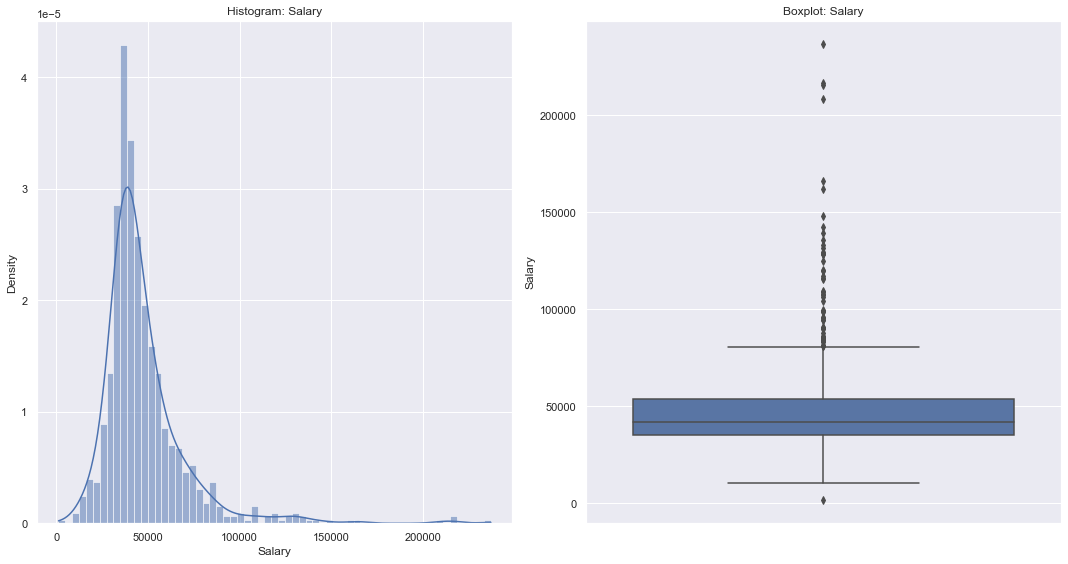

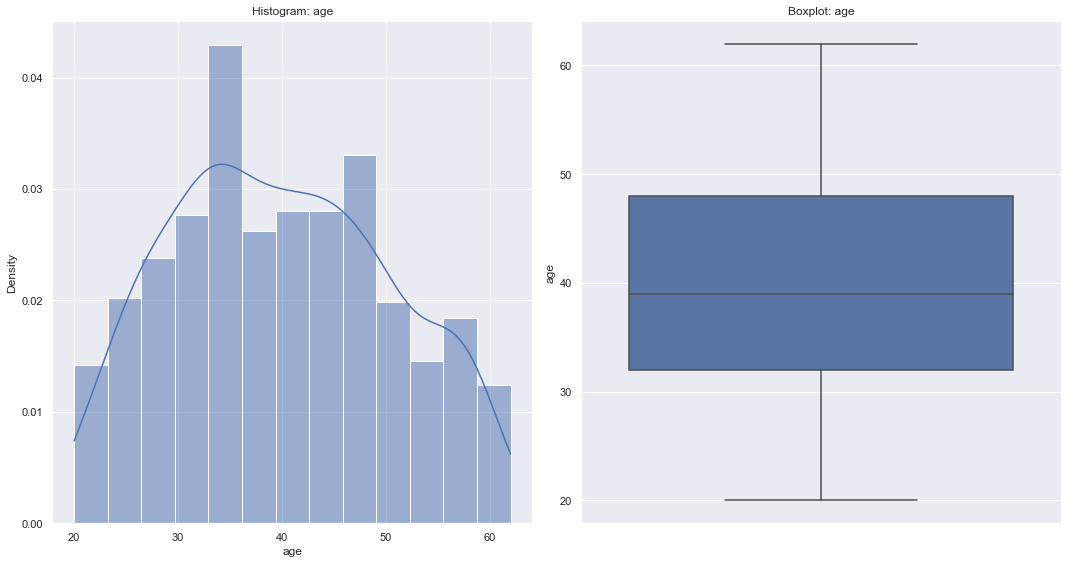

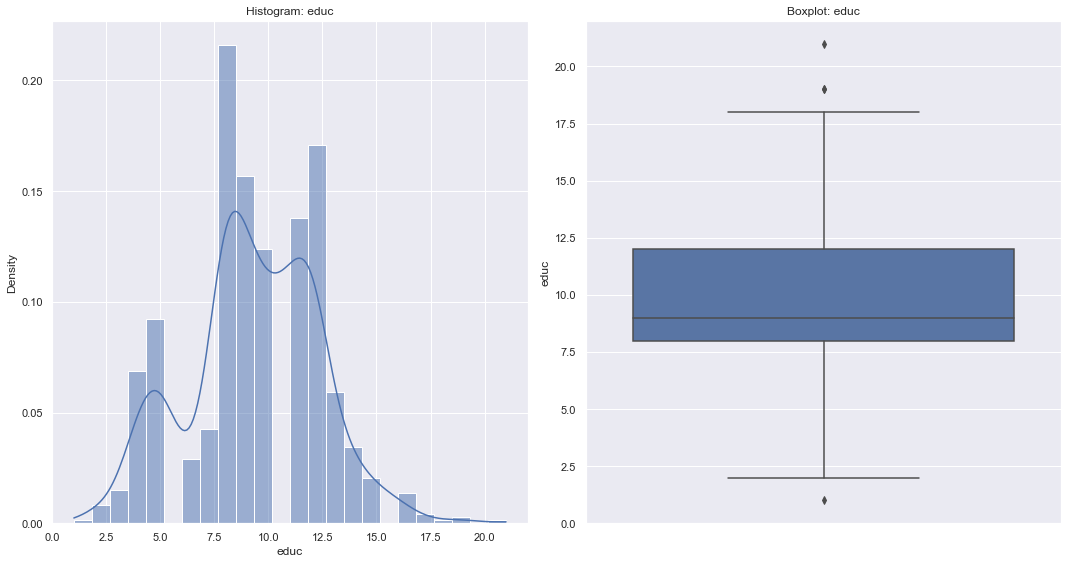

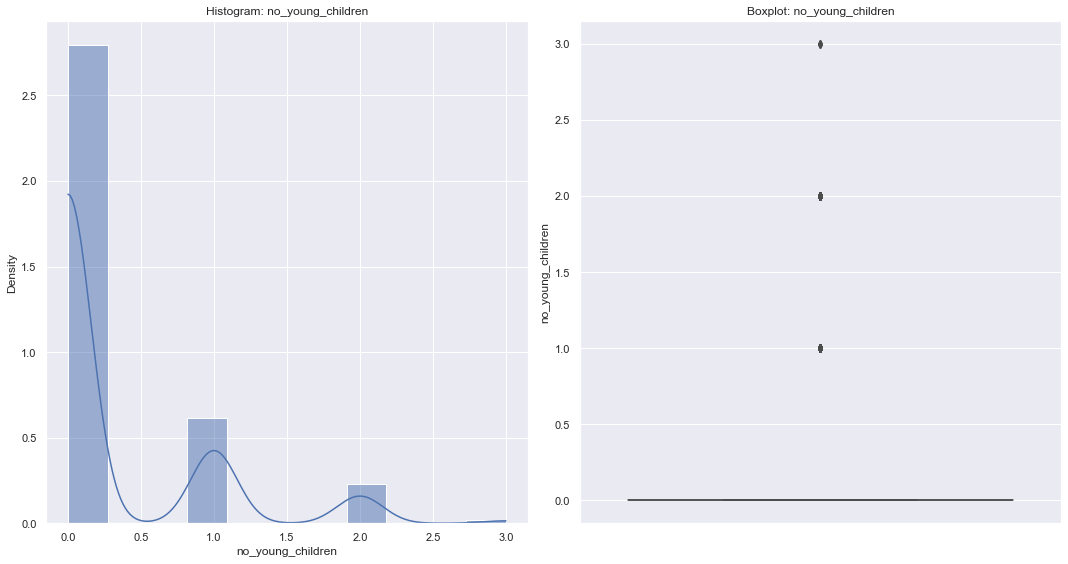

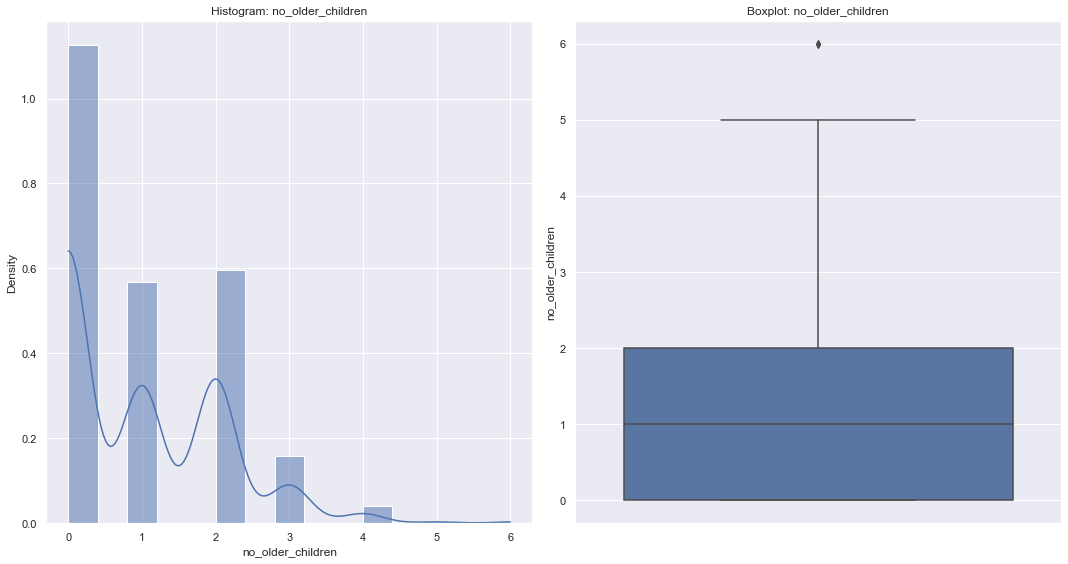

In [87]:
# Check the histogram and boxplot of the 7 numeric varaibles
for i in df.columns:
    if df[i].dtype not in ['object']:
        print(i,"-",stats.shapiro(df[i]))
        plt.figure(figsize = (15,8));
        plt.subplot(1,2,1);
        sns.histplot(x=df[i],kde=True,stat='density');
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=df[i],data=df);
        plt.title('Boxplot: {}'.format(i))                
        plt.tight_layout();

In [88]:
# Lets look at the categorical column value counts.
for i in df.columns:
    if df[i].dtype in ['object']:
        print ( i, ':')
        print(df[i].value_counts())
        print('------------------','\n','\n')

Holliday_Package :
no     471
yes    401
Name: Holliday_Package, dtype: int64
------------------ 
 

foreign :
no     656
yes    216
Name: foreign, dtype: int64
------------------ 
 



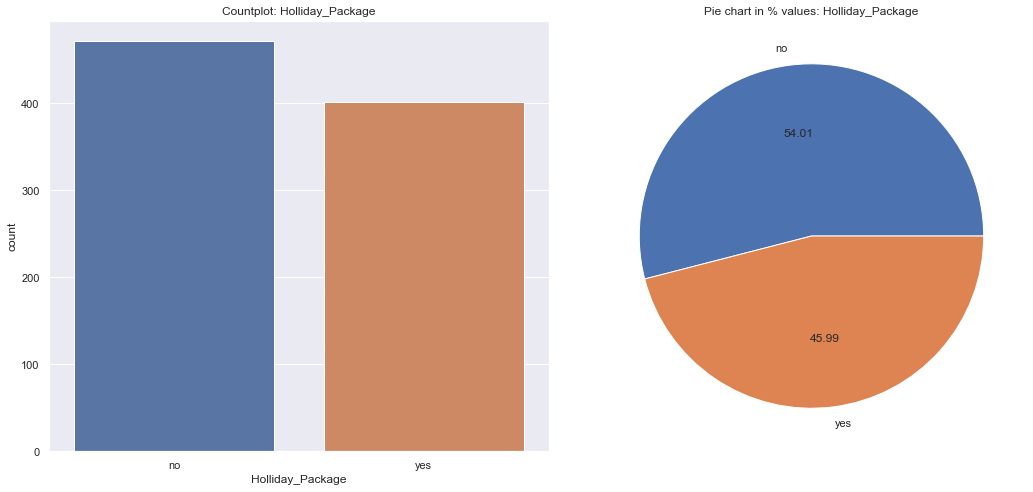

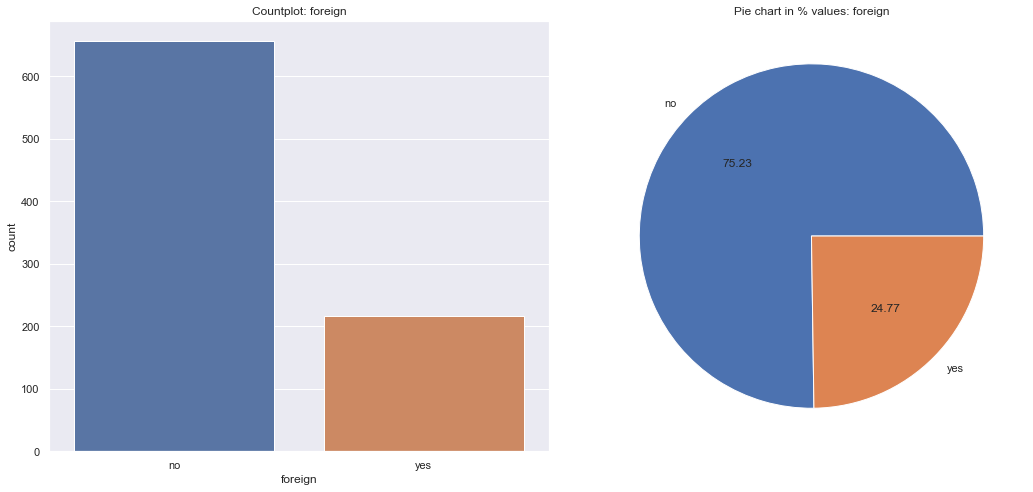

In [89]:
# countplot and piechart showing distribution of categories across the variable for object columns
for i in df.columns:
    if df[i].dtype in ['object']:
        plt.figure(figsize = (15,7))
        plt.subplot(1,2,1)
        sns.countplot(x=df[i],order = df[i].value_counts().index);
        plt.title('Countplot: {}'.format(i));
        plt.subplot(1,2,2);
        plt.pie(x=df[i].value_counts(),labels = df[i].value_counts().index,autopct='%.2f')
        plt.title('Pie chart in % values: {}'.format(i))                
        plt.tight_layout();
        

In [90]:
# Outlier treatment. Lets check number of outliers in salary
df[df['Salary'] > 80687.75]['Salary'].count()

56

### Bivariate/Multivariate Analysis

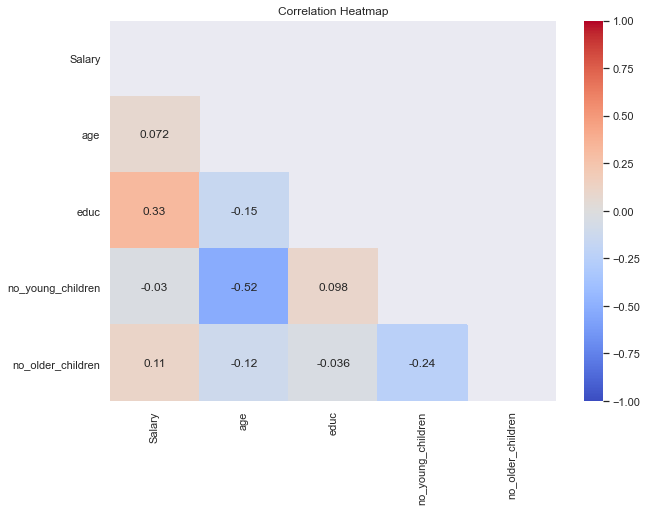

In [91]:
#Plot a heatmap of correlation between variables
plt.figure(figsize=(10,7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap');

<Figure size 1080x720 with 0 Axes>

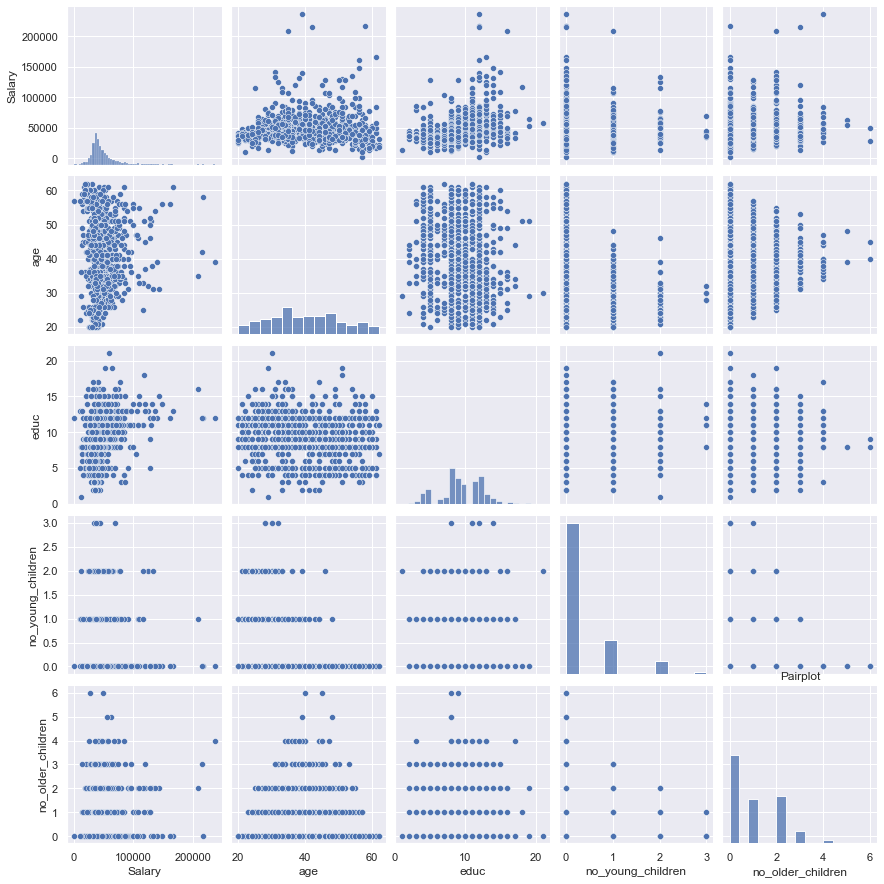

In [92]:
#Plot a pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df);
plt.title('Pairplot');

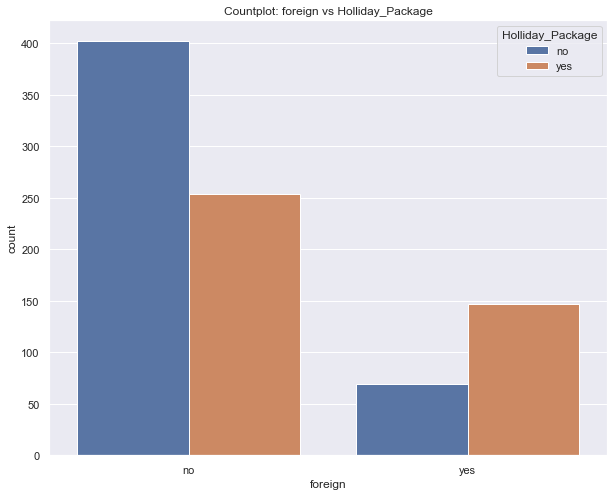

In [93]:
# Let us look at foreign vs Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df,x='foreign',hue='Holliday_Package');
plt.title('Countplot: foreign vs Holliday_Package');

In [94]:
df.groupby('foreign')['Holliday_Package'].value_counts()

foreign  Holliday_Package
no       no                  402
         yes                 254
yes      yes                 147
         no                   69
Name: Holliday_Package, dtype: int64

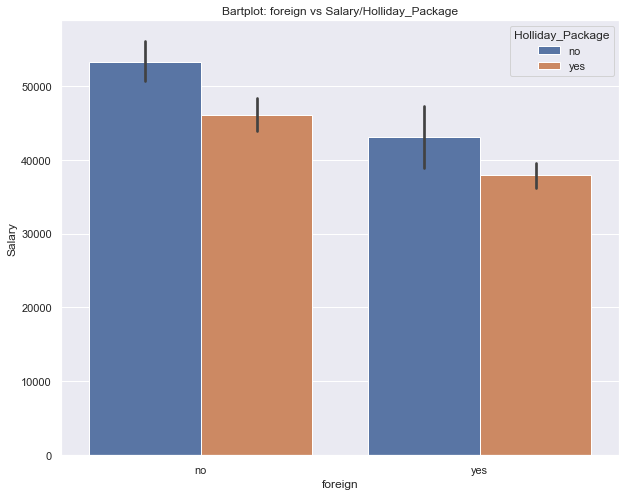

In [95]:
# Lets look at the salary of employees w.r.t foreign
plt.figure(figsize=(10,8));
sns.barplot(data=df,y='Salary',x='foreign',hue = 'Holliday_Package')
plt.title('Bartplot: foreign vs Salary/Holliday_Package');

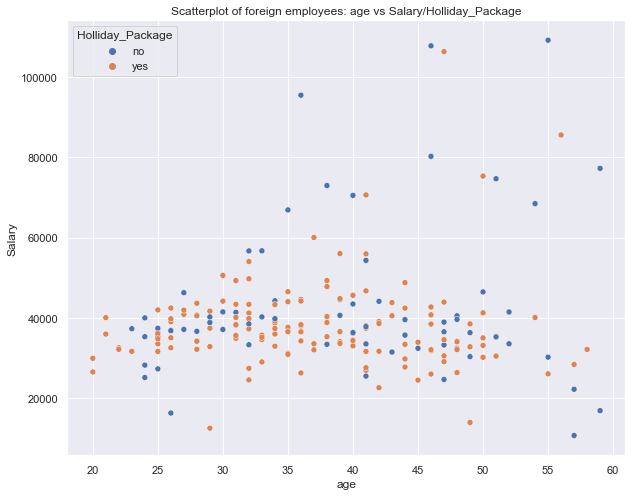

In [96]:
plt.figure(figsize=(10,8));
sns.scatterplot(data=df[df['foreign'] == 'yes'],x='age',y='Salary',hue = 'Holliday_Package',hue_order=['no','yes']);
plt.title('Scatterplot of foreign employees: age vs Salary/Holliday_Package');

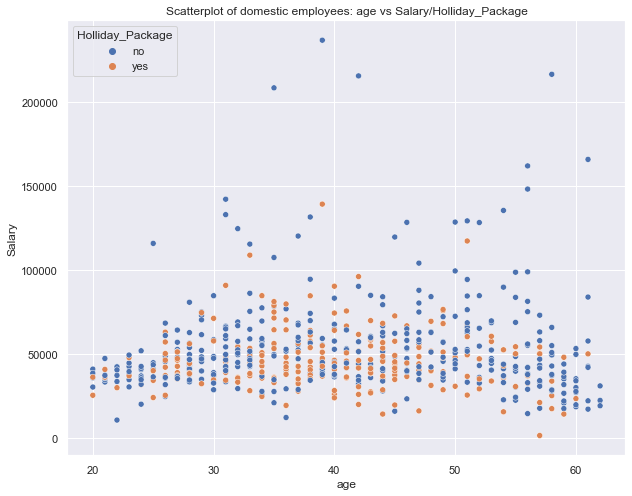

In [97]:
plt.figure(figsize=(10,8));
sns.scatterplot(data=df[df['foreign'] == 'no'],x='age',y='Salary',hue = 'Holliday_Package');
plt.title('Scatterplot of domestic employees: age vs Salary/Holliday_Package');

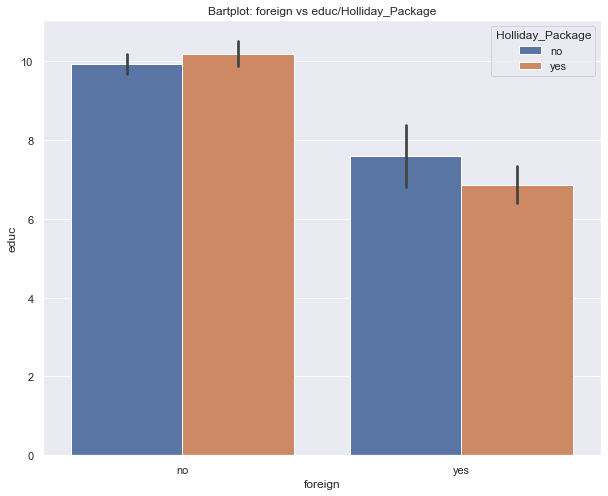

In [98]:
# Lets look at the educ of employees w.r.t foreign
plt.figure(figsize=(10,8));
sns.barplot(data=df,y='educ',x='foreign',hue = 'Holliday_Package')
plt.title('Bartplot: foreign vs educ/Holliday_Package');

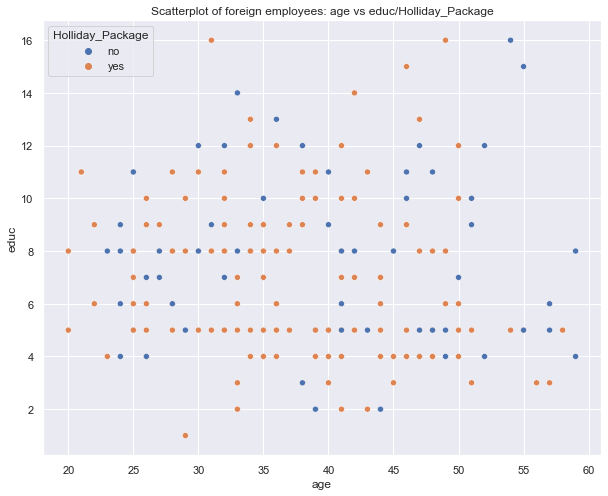

In [99]:
# Lets look at the scatterplot of age vs educ of foreign 
plt.figure(figsize=(10,8));
sns.scatterplot(data=df[df['foreign'] == 'yes'],x='age',y='educ',hue = 'Holliday_Package',hue_order=['no','yes']);
plt.title('Scatterplot of foreign employees: age vs educ/Holliday_Package');

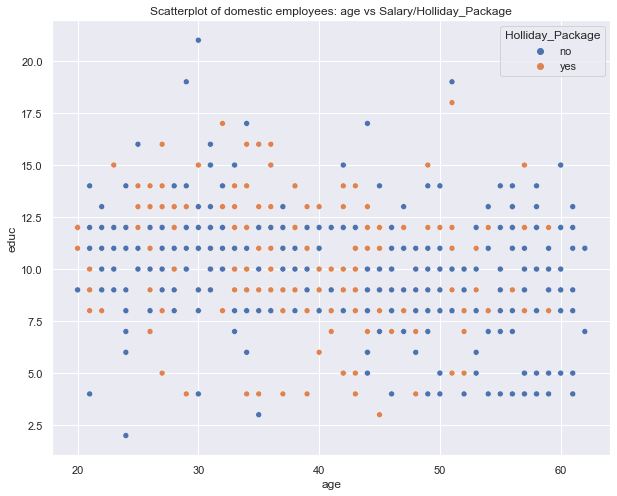

In [100]:
# Lets look at the scatterplot of age vs educ of domestic
plt.figure(figsize=(10,8));
sns.scatterplot(data=df[df['foreign'] == 'no'],x='age',y='educ',hue = 'Holliday_Package',hue_order=['no','yes']);
plt.title('Scatterplot of domestic employees: age vs Salary/Holliday_Package');

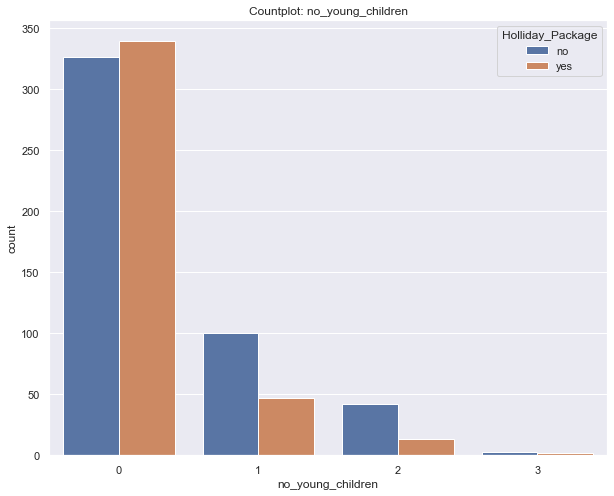

In [101]:
# Lets see how no_young_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df,x='no_young_children',hue='Holliday_Package');
plt.title('Countplot: no_young_children');

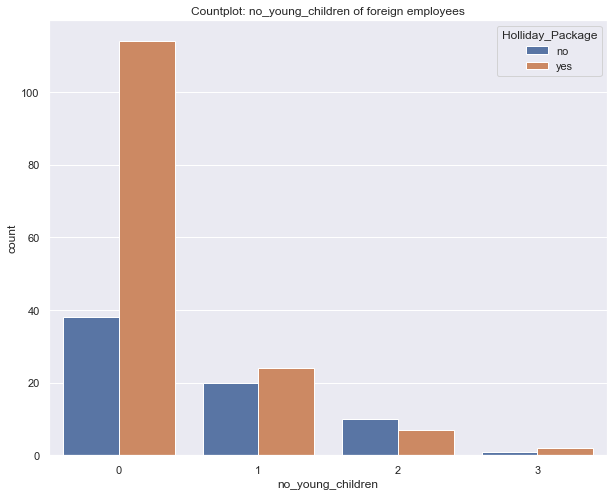

In [102]:
# Lets check for foreign employees how no_young_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df[df['foreign'] == 'yes'],x='no_young_children',hue='Holliday_Package',hue_order=['no','yes']);
plt.title('Countplot: no_young_children of foreign employees');

In [103]:
# Crosstab for no_young_children of foreign employees against Holliday_Package
df_foreign = df[df['foreign'] == 'yes']
pd.crosstab(df_foreign['no_young_children'],df_foreign['Holliday_Package'])

Holliday_Package,no,yes
no_young_children,,
0,38,114
1,20,24
2,10,7
3,1,2


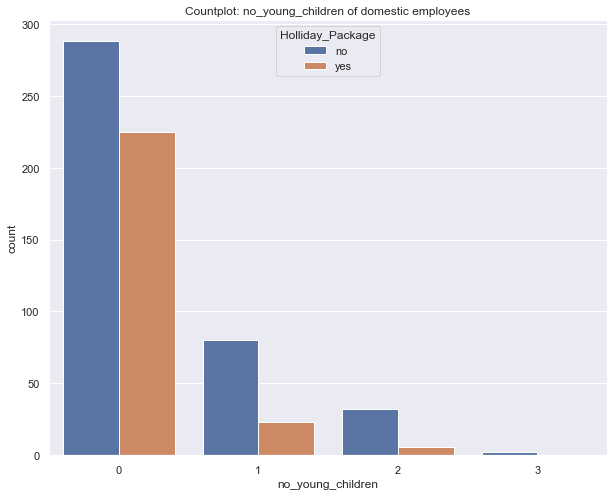

In [104]:
# Lets check for domestic employees how no_young_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df[df['foreign'] == 'no'],x='no_young_children',hue='Holliday_Package',hue_order=['no','yes']);
plt.title('Countplot: no_young_children of domestic employees');

In [105]:
# Crosstab for no_young_children of domestic employees against Holliday_Package
df_domestic = df[df['foreign'] == 'no']
pd.crosstab(df_domestic['no_young_children'],df_domestic['Holliday_Package'])

Holliday_Package,no,yes
no_young_children,,
0,288,225
1,80,23
2,32,6
3,2,0


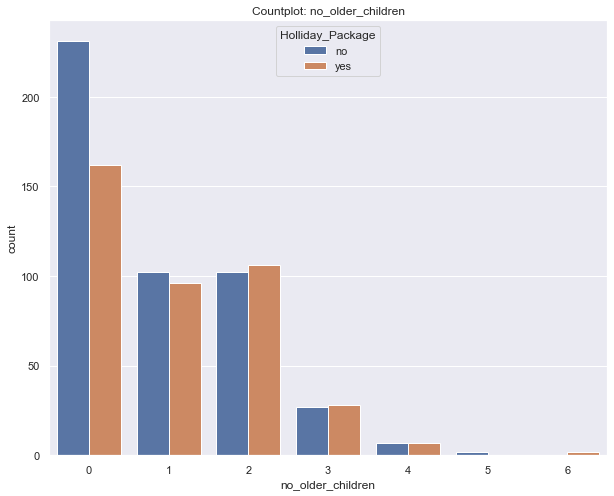

In [106]:
# Lets see how no_older_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df,x='no_older_children',hue='Holliday_Package');
plt.title('Countplot: no_older_children');

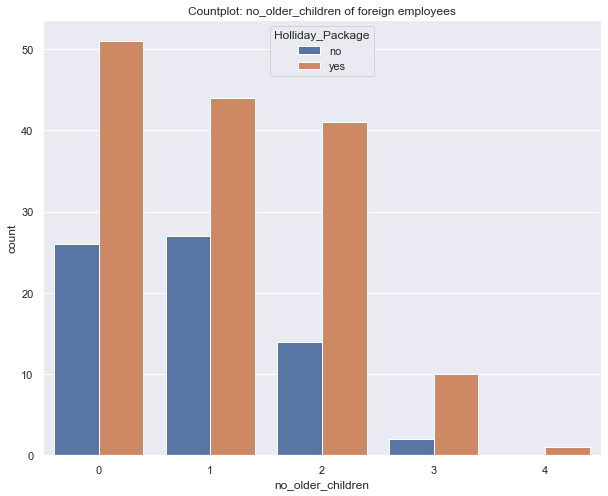

In [107]:
# Lets check for foreign employees how no_older_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df[df['foreign'] == 'yes'],x='no_older_children',hue='Holliday_Package',hue_order=['no','yes']);
plt.title('Countplot: no_older_children of foreign employees');

In [108]:
# Crosstab for no_young_children of foreign employees against Holliday_Package
df_foreign = df[df['foreign'] == 'yes']
pd.crosstab(df_foreign['no_older_children'],df_foreign['Holliday_Package'])

Holliday_Package,no,yes
no_older_children,,
0,26,51
1,27,44
2,14,41
3,2,10
4,0,1


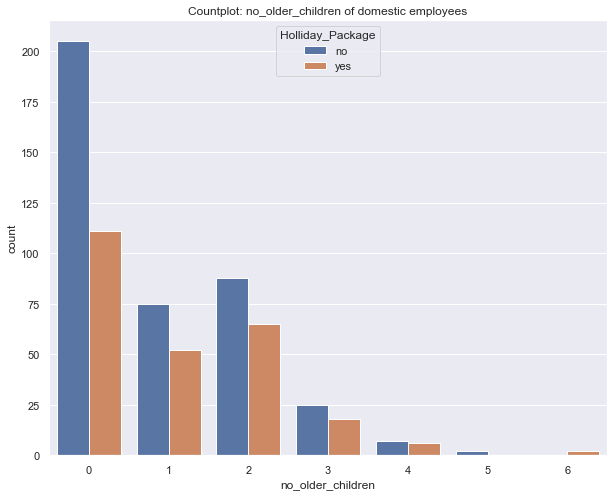

In [109]:
# Lets check for domestic employees how no_older_children variable influences Holliday_Package
plt.figure(figsize=(10,8));
sns.countplot(data=df[df['foreign'] == 'no'],x='no_older_children',hue='Holliday_Package',hue_order=['no','yes']);
plt.title('Countplot: no_older_children of domestic employees');

In [110]:
# Crosstab for no_older_children of domestic employees against Holliday_Package
df_domestic = df[df['foreign'] == 'no']
pd.crosstab(df_domestic['no_older_children'],df_domestic['Holliday_Package'])

Holliday_Package,no,yes
no_older_children,,
0,205,111
1,75,52
2,88,65
3,25,18
4,7,6
5,2,0
6,0,2


## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [111]:
# Lets encode the data using dummy
df2 = pd.get_dummies(df,columns=['Holliday_Package','foreign'],drop_first=True)
df2.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [112]:
# We will split the data into train & test (70:30)
# Copy all the predictor variables into X dataframe
X = df2.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = df2['Holliday_Package_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [113]:
y_train.value_counts(normalize=True)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [114]:
y_test.value_counts(normalize=True)

0    0.553435
1    0.446565
Name: Holliday_Package_yes, dtype: float64

### Apply Logistic Regression

In [115]:
# Lets apply Logistic regression on the training model
lgr_model =LogisticRegression(random_state = 1)
lgr_model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [116]:
lgr_model.score(X_train,y_train)

0.519672131147541

In [117]:
# Lets use grid searchcv to see if the model improves with different input parameters
lgr_model =LogisticRegression(random_state = 1)

param_grid = { 'solver' :['lbfgs','liblinear'],
               'tol' : [0.0001,0.00001,0.000001],
               'max_iter' : [100,1000,10000]
                }

grid_search = GridSearchCV(estimator = lgr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_iter': 100, 'solver': 'liblinear', 'tol': 1e-06}

In [118]:
param_grid = { 'solver' :['liblinear'],
               'tol' : [0.000001,0.00000001],
               'max_iter' : [50,75,100,125]
                }

grid_search = GridSearchCV(estimator = lgr_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_iter': 50, 'solver': 'liblinear', 'tol': 1e-06}

In [119]:
# The parameters are fine tuned, lets store the best parameter into lgr_model
lgr_model = grid_search.best_estimator_
lgr_model

LogisticRegression(max_iter=50, random_state=1, solver='liblinear', tol=1e-06)

In [120]:
lgr_model.score(X_train,y_train)

0.6704918032786885

### Apply Linear Discriminant Analysis

In [121]:
# Lets apply Linear Discriminant Analysis on the training model
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train)

In [122]:
lda_model.score(X_train,y_train)

0.6721311475409836

In [123]:
# Lets use grid searchcv to see if the model improves with different input parameters
lda = LinearDiscriminantAnalysis()

param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.0001,0.00001,0.000001]
                }

grid_search = GridSearchCV(estimator = lda_model,param_grid=param_grid,cv =10)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [124]:
lda_model = grid_search.best_estimator_
lda_model

LinearDiscriminantAnalysis()

In [125]:
lda_model.score(X_train,y_train)

0.6721311475409836

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic Regression

In [126]:
# Let us first check Logistic regression performance on training set
print('The accuracy of Logistic regression model on training set is {}'.format(lgr_model.score(X_train,y_train)))

The accuracy of Logistic regression model on training set is 0.6704918032786885


In [127]:
# Let us check the confusion matrix for training data
y_train_predict = lgr_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 250                  76
Actual Positive                 125                 159


The ROC_AUC score for Logistic Regression model on training data is 0.7429901494858723


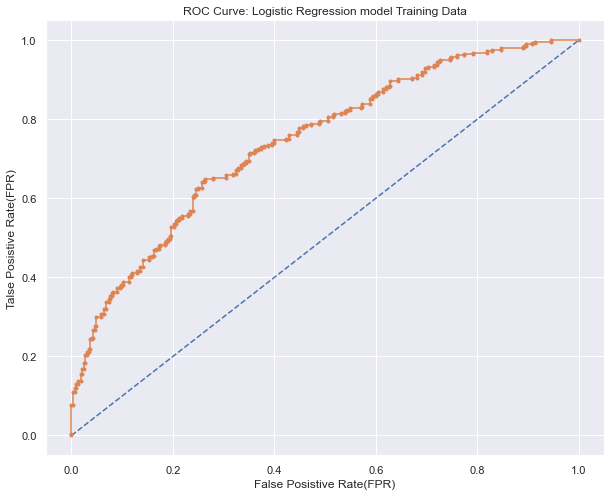

In [128]:
# Lets check the ROC_AUC score and ROC curve for traing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lgr_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model on training data is {}'.format(roc_auc_score(y_train,lgr_model.predict_proba(X_train)[:,1])))

In [129]:
# Lets check the classification report for CART model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [130]:
# Store the classification report of training data for Logistic regression Model into a dataframe
lgr_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lgr_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.667,0.677,0.67,0.672,0.671
recall,0.767,0.560,0.67,0.663,0.670
f1-score,0.713,0.613,0.67,0.663,0.666
support,326.000,284.000,0.67,610.000,610.000


In [131]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lgr_train_metrics = [lgr_train_report.iloc[0,2], #accuracy
                     lgr_train_report.iloc[0,1], # precision of Holliday_Package claimed
                     lgr_train_report.iloc[1,1], # recall of Holliday_Package claimed
                     lgr_train_report.iloc[2,1], # f1-score of Holliday_Package claimed
                      round(roc_auc_score(y_train,lgr_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lgr_train_metrics

[0.67, 0.677, 0.56, 0.613, 0.743]

In [132]:
# Let us check Logistic regression performance on testing set
print('The accuracy of Logistic regression model on test set is {}'.format(lgr_model.score(X_test,y_test)))

The accuracy of Logistic regression model on test set is 0.6450381679389313


In [133]:
# Let us check the confusion matrix for testing data
y_test_predict = lgr_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 103                  42
Actual Positive                  51                  66


The ROC_AUC score for Logistic Regression model on test data is 0.7019746536987916


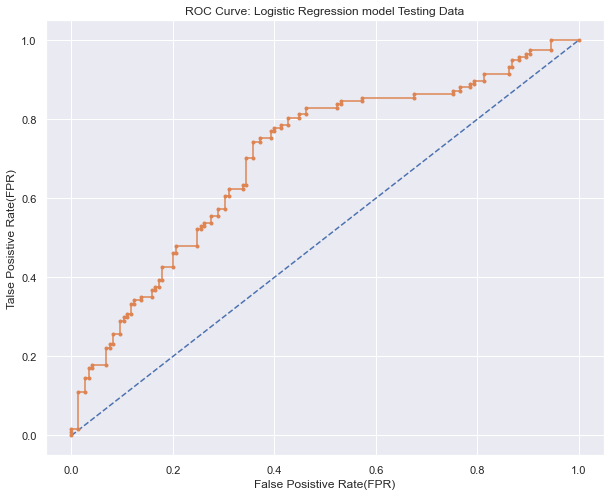

In [134]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lgr_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for Logistic Regression model on test data is {}'.format(roc_auc_score(y_test,lgr_model.predict_proba(X_test)[:,1])))

In [135]:
# Lets check the classification report for CART model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       145
           1       0.61      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [136]:
# Store the classification report of testing data for Logistic regression Model into a dataframe
lgr_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lgr_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.669,0.611,0.645,0.640,0.643
recall,0.710,0.564,0.645,0.637,0.645
f1-score,0.689,0.587,0.645,0.638,0.643
support,145.000,117.000,0.645,262.000,262.000


In [137]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lgr_test_metrics = [lgr_test_report.iloc[0,2], #accuracy
                    lgr_test_report.iloc[0,1], # precision of Holliday_Package claimed
                    lgr_test_report.iloc[1,1], # recall of Holliday_Package claimed
                    lgr_test_report.iloc[2,1], # f1-score of Holliday_Package claimed
                     round(roc_auc_score(y_test,lgr_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lgr_test_metrics

[0.645, 0.611, 0.564, 0.587, 0.702]

In [138]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
lgr_metrics = pd.DataFrame(lgr_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['LGR_training'])
lgr_metrics['LGR_test'] = lgr_test_metrics
lgr_metrics

,LGR_training,LGR_test
accuracy,0.670,0.645
precision,0.677,0.611
recall,0.560,0.564
f1-score,0.613,0.587
roc_auc_score,0.743,0.702


### Linear Discriminant Analysis

In [139]:
# Let us first check LDA performance on training set
print('The accuracy of LDA model on training set is {}'.format(lda_model.score(X_train,y_train)))

The accuracy of LDA model on training set is 0.6721311475409836


In [140]:
# Let us check the confusion matrix for training data
y_train_predict = lda_model.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_train_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 252                  74
Actual Positive                 126                 158


The ROC_AUC score for LDA model on training data is 0.7421152682968979


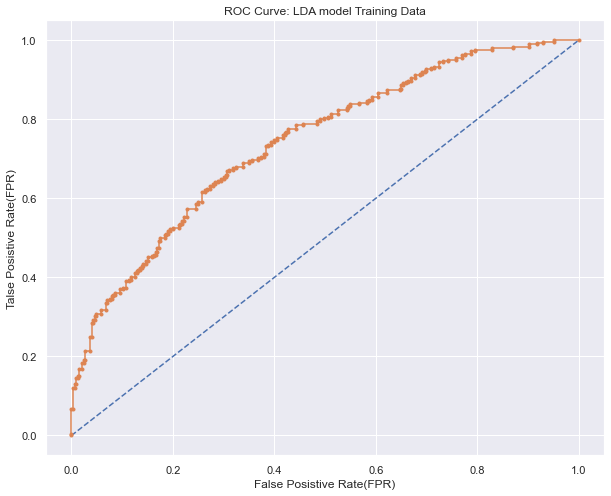

In [141]:
# Lets check the ROC_AUC score and ROC curve for training data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model Training Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model on training data is {}'.format(roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1])))

In [142]:
# Lets check the classification report for LDA model on training data
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [143]:
# Store the classification report of training data for Logistic regression Model into a dataframe
lda_train_report = round(pd.DataFrame(classification_report(y_train,y_train_predict,output_dict=True)),3)
lda_train_report

,0,1,accuracy,macro avg,weighted avg
precision,0.667,0.681,0.672,0.674,0.673
recall,0.773,0.556,0.672,0.665,0.672
f1-score,0.716,0.612,0.672,0.664,0.668
support,326.000,284.000,0.672,610.000,610.000


In [144]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lda_train_metrics = [lda_train_report.iloc[0,2], #accuracy
                     lda_train_report.iloc[0,1], # precision of Holliday_Package claimed
                     lda_train_report.iloc[1,1], # recall of Holliday_Package claimed
                     lda_train_report.iloc[2,1], # f1-score of Holliday_Package claimed
                      round(roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]),3)] # roc_auc_score
lda_train_metrics

[0.672, 0.681, 0.556, 0.612, 0.742]

In [145]:
# Let us check LDA performance on testing set
print('The accuracy of LDA model on test set is {}'.format(lda_model.score(X_test,y_test)))

The accuracy of LDA model on test set is 0.6412213740458015


In [146]:
# Let us check the confusion matrix for testing data
y_test_predict = lda_model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test,y_test_predict),index = ['Actual Negative','Actual Positive'],
                  columns = ['Predicted Negative','Predicted Positive']))

                 Predicted Negative  Predicted Positive
Actual Negative                 103                  42
Actual Positive                  52                  65


The ROC_AUC score for LDA model on training data is 0.7029177718832891


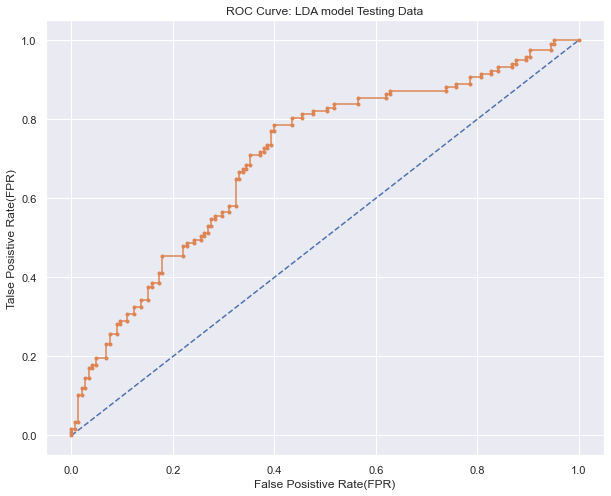

In [147]:
# Lets check the ROC_AUC score and ROC curve for testing data
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model on training data is {}'.format(roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1])))

In [148]:
# Lets check the classification report for LDA model on testing data
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [149]:
# Store the classification report of testing data for Cart Model into a dataframe
lda_test_report = round(pd.DataFrame(classification_report(y_test,y_test_predict,output_dict=True)),3)
lda_test_report

,0,1,accuracy,macro avg,weighted avg
precision,0.665,0.607,0.641,0.636,0.639
recall,0.710,0.556,0.641,0.633,0.641
f1-score,0.687,0.580,0.641,0.634,0.639
support,145.000,117.000,0.641,262.000,262.000


In [150]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lda_test_metrics = [lda_test_report.iloc[0,2], #accuracy
                    lda_test_report.iloc[0,1], # precision of Holliday_Package claimed
                    lda_test_report.iloc[1,1], # recall of Holliday_Package claimed
                    lda_test_report.iloc[2,1], # f1-score of Holliday_Package claimed
                     round(roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]),3)] # roc_auc_score
lda_test_metrics

[0.641, 0.607, 0.556, 0.58, 0.703]

In [151]:
# Lets create a dataframe to compare test and training model metrics of Logistic Regression model.
lda_metrics = pd.DataFrame(lda_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['LDA_training'])
lda_metrics['LDA_test'] = lda_test_metrics
lda_metrics

,LDA_training,LDA_test
accuracy,0.672,0.641
precision,0.681,0.607
recall,0.556,0.556
f1-score,0.612,0.580
roc_auc_score,0.742,0.703


In [152]:
# Lets perform the models comparison
model_comparison = pd.concat([lgr_metrics,lda_metrics],axis = 1)
model_comparison

,LGR_training,LGR_test,LDA_training,LDA_test
accuracy,0.670,0.645,0.672,0.641
precision,0.677,0.611,0.681,0.607
recall,0.560,0.564,0.556,0.556
f1-score,0.613,0.587,0.612,0.580
roc_auc_score,0.743,0.702,0.742,0.703


In [153]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,lda_model.coef_[0][idx]))

The coefficient for Salary is -1.4754954809881397e-05
The coefficient for age is -0.05430378306113369
The coefficient for educ is 0.07596537387390198
The coefficient for no_young_children is -1.4285464350098698
The coefficient for no_older_children is -0.04635929801474014
The coefficient for foreign_yes is 1.6239034671206722
